In [ ]:
# Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# É necessário ter o arquivo "trabalho2_dados_grupo-08.csv" no ambiente do colab
db = pd.read_csv("trabalho2_dados_grupo-08.csv")

# Conhecendo os Dados

In [ ]:
# Exibe as "n" primeiras linhas
n = 10
db.head(n)

,Candidate ID,Name,Number of characters in Original Name,Month of Birth,Year of Birth,Gender,State (Location),10th percentage,12th percentage,10th Completion Year,...,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance
0,1131,PtS,13,FEB,Y7,A,N,83.80,84.00,Y13,...,65.363128,63.005780,48.2142857142857,68.345324,68.275862,59.124088,90.9090909090909,81.012658,95.402299,BP
1,130,AyS,11,NOV,Y7,B,D,84.40,77.00,Y14,...,56.424581,65.317919,50,66.906475,68.275862,60.583942,67.2727272727273,88.607595,56.321839,BP
2,882,CiK,13,MAR,Y8,B,N,86.26,62.83,Y14,...,50.837989,52.601156,46.4285714285714,56.834532,72.413793,64.963504,60,79.746835,32.183908,BP
3,28,AhS,12,MAR,Y8,A,F,81.00,72.00,Y14,...,55.307263,56.069364,35.7142857142857,53.956835,71.034483,50.364964,47.2727272727273,73.417722,35.632184,BP
4,239,MnV,25,NOV,Y7,A,E,62.92,68.00,Y14,...,38.547486,61.849711,19.6428571428571,39.568345,43.448276,62.043796,45.4545454545455,60.759494,40.229885,BP
5,250,RiC,12,FEB,Y8,B,D,80.60,74.40,Y14,...,59.776536,56.069364,21.4285714285714,74.100719,43.448276,48.905109,50.9090909090909,60.759494,51.724138,MD
6,387,XrB,12,JAN,Y8,A,A,81.45,88.25,Y14,...,58.659218,49.132948,46.4285714285714,69.784173,47.586207,82.481752,61.8181818181818,50.632911,67.816092,BP
7,560,CnG,11,OCT,Y7,A,D,89.40,85.80,Y14,...,68.715084,60.693642,71.4285714285714,74.100719,80.689655,85.401460,56.3636363636364,62.025316,50.574713,BP
8,1414,PaS,13,DEC,Y7,B,N,87.06,77.67,Y14,...,73.184358,51.445087,46.4285714285714,74.100719,46.206897,73.722628,47.2727272727273,70.886076,37.931034,BP
9,318,MaB,13,FEB,Y7,B,E,84.40,79.20,Y14,...,45.251397,50.289017,58.9285714285714,79.856115,73.793103,62.043796,49.0909090909091,75.949367,37.931034,MP


In [ ]:
# Formato da base (número de linhas e colunas)
db.shape

(469, 31)

In [ ]:
# Tipos de dados
db.dtypes

,0
Candidate ID,int64
Name,object
Number of characters in Original Name,int64
Month of Birth,object
Year of Birth,object
Gender,object
State (Location),object
10th percentage,float64
12th percentage,float64
10th Completion Year,object


In [ ]:
# Resumo das informações do conjunto de dados
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate ID                           469 non-null    int64  
 1   Name                                   469 non-null    object 
 2   Number of characters in Original Name  469 non-null    int64  
 3   Month of Birth                         469 non-null    object 
 4   Year of Birth                          469 non-null    object 
 5   Gender                                 469 non-null    object 
 6   State (Location)                       469 non-null    object 
 7    10th percentage                       469 non-null    float64
 8    12th percentage                       469 non-null    float64
 9   10th Completion Year                   469 non-null    object 
 10  12th Completion year                   469 non-null    object 
 11  Degree

## Verificação de valores ausentes e duplicados

In [ ]:
# Verificação de valores ausentes
md_count = (db == "MD").sum()
md_count

,0
Candidate ID,0
Name,0
Number of characters in Original Name,0
Month of Birth,0
Year of Birth,0
Gender,0
State (Location),0
10th percentage,0
12th percentage,0
10th Completion Year,0


In [ ]:
# Verificação de valores ausentes por coluna
for column, quantity in md_count.items():
  if quantity > 0:
    print(f"{column}: {quantity}")

Quantitative Ability 1: 6
Domain Skills 1: 3
Analytical Skills 1: 9
Performance: 17


In [ ]:
# Verificar se há dados duplicados
print(db.duplicated().sum())

86


In [ ]:
db[db.duplicated(keep=False)].shape

(172, 31)

In [ ]:
# Seleciona uma linha duplicada para visualização
example_duplicate = db[db.duplicated(keep=False)].iloc[0]

# Mostrar as ocorrências dessa exemplo
especif_row = db[db.eq(example_duplicate).all(axis=1)]
especif_row

,Candidate ID,Name,Number of characters in Original Name,Month of Birth,Year of Birth,Gender,State (Location),10th percentage,12th percentage,10th Completion Year,...,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance
0,1131,PtS,13,FEB,Y7,A,N,83.8,84.0,Y13,...,65.363128,63.00578,48.2142857142857,68.345324,68.275862,59.124088,90.9090909090909,81.012658,95.402299,BP
422,1131,PtS,13,FEB,Y7,A,N,83.8,84.0,Y13,...,65.363128,63.00578,48.2142857142857,68.345324,68.275862,59.124088,90.9090909090909,81.012658,95.402299,BP


In [ ]:
# Mostrar a distribuição de duplicatas em grupos
duplicates = db[db.duplicated(keep=False)]
count_group = duplicates.groupby(duplicates.columns.tolist()).size()
print(count_group.value_counts())

2    86
Name: count, dtype: int64


## Descrições

In [ ]:
def describe(column):
  print(f"== {column} ==")
  print(db[column].describe())
  print()

for column in db.columns:
  describe(column)

== Candidate ID ==
count     469.000000
mean      716.976546
std       403.041287
min         9.000000
25%       387.000000
50%       737.000000
75%      1066.000000
max      1418.000000
Name: Candidate ID, dtype: float64

== Name ==
count     469
unique    329
top       SaK
freq        6
Name: Name, dtype: object

== Number of characters in Original Name ==
count    469.000000
mean      13.176972
std        3.179230
min        8.000000
25%       11.000000
50%       12.000000
75%       15.000000
max       27.000000
Name: Number of characters in Original Name, dtype: float64

== Month of Birth ==
count     469
unique     12
top       DEC
freq       55
Name: Month of Birth, dtype: object

== Year of Birth ==
count     469
unique      7
top        Y7
freq      256
Name: Year of Birth, dtype: object

== Gender ==
count     469
unique      2
top         A
freq      281
Name: Gender, dtype: object

== State (Location) ==
count     469
unique     21
top         E
freq       79
Name: State (Lo

## Distribuição da variável Performance

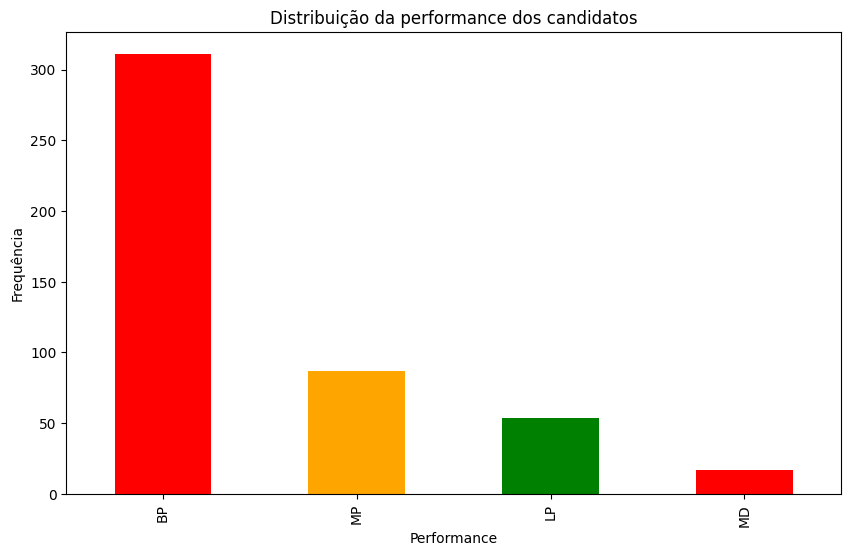

In [ ]:
# Análise da distribuição da // variável alvo // (performance)
plt.figure(figsize=(10, 6))
db['Performance'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribuição da performance dos candidatos')
plt.xlabel('Performance')
plt.ylabel('Frequência')
plt.show()

# Tratamento dos Dados

## Remoção de duplicidades

In [ ]:
print(f"DB Original: {len(db)} linhas")
db = db.drop_duplicates()
print(f"Sem duplicidades: {len(db)} linhas")

DB Original: 469 linhas
Sem duplicidades: 383 linhas


In [ ]:
print(f"Linhas duplicadas após o tratamento: {db.duplicated().sum()}")
print(f"Linhas com 'Candidate ID' duplicado: {db.duplicated(subset=['Candidate ID']).sum()}")
print(f"Linhas que possuem 'Name' e 'Number of characters in Original Name' duplicados: {db.duplicated(subset=['Name',	'Number of characters in Original Name']).sum()}")

Linhas duplicadas após o tratamento: 0
Linhas com 'Candidate ID' duplicado: 0
Linhas que possuem 'Name' e 'Number of characters in Original Name' duplicados: 6


In [ ]:
db[db.duplicated(subset=["Name",	"Number of characters in Original Name"], keep=False)].sort_values(["Name",	"Number of characters in Original Name"])

,Candidate ID,Name,Number of characters in Original Name,Month of Birth,Year of Birth,Gender,State (Location),10th percentage,12th percentage,10th Completion Year,...,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance
44,577,AaP,12,JAN,Y8,B,D,88.00,86.00,Y14,...,59.776536,58.381503,69.6428571428571,81.294964,72.413793,81.021898,58.1818181818182,77.215190,45.977011,BP
104,979,AaP,12,NOV,Y7,B,I,81.33,66.17,Y14,...,70.949721,74.566474,42.8571428571429,61.151079,57.241379,69.343066,85.4545454545455,83.544304,83.908046,MP
18,168,AtM,9,DEC,Y8,A,J,69.80,65.60,Y14,...,67.597765,75.722543,48.2142857142857,55.395683,72.413793,72.262774,65.4545454545455,55.696203,67.816092,BP
118,580,AtM,9,JUL,Y7,A,B,88.00,76.80,Y13,...,74.301676,72.254335,71.4285714285714,87.050360,75.172414,73.722628,70.9090909090909,79.746835,52.873563,BP
80,494,DiK,14,MAR,Y8,B,D,90.10,84.60,Y14,...,60.893855,76.878613,66.0714285714286,78.417266,79.310345,67.883212,87.2727272727273,72.151899,73.563218,BP
288,100,DiK,14,APR,Y8,B,A,85.00,93.00,Y14,...,60.893855,59.537572,16.0714285714286,39.568345,61.379310,41.605839,60,68.354430,56.321839,MD
89,1018,SaK,10,JUN,Y7,B,N,86.60,77.20,Y13,...,59.776536,54.913295,57.1428571428571,76.978417,60.000000,76.642336,63.6363636363636,70.886076,60.919540,MP
135,1004,SaK,10,DEC,Y7,B,N,78.40,72.50,Y14,...,65.363128,52.601156,58.9285714285714,76.978417,64.137931,75.182482,70.9090909090909,73.417722,72.413793,BP
218,466,SmM,10,SEP,Y7,A,A,81.60,91.50,Y14,...,65.363128,50.289017,37.5,58.273381,42.068966,75.182482,58.1818181818182,55.696203,60.919540,BP
463,1199,SmM,10,DEC,Y7,A,J,78.60,84.20,Y14,...,82.122905,79.190751,64.2857142857143,75.539568,72.413793,79.562044,78.1818181818182,81.012658,77.011494,BP


## Tratamento de valores ausentes

In [ ]:
md_count = (db == "MD").sum()
# Verificação de valores ausentes por coluna
for column, quantity in md_count.items():
  if quantity > 0:
    print(f"{column}: {quantity}")

Quantitative Ability 1: 4
Domain Skills 1: 2
Analytical Skills 1: 6
Performance: 14


In [ ]:
# Tratamento para a variável Performance - remover linhas com Performance ausente
db = db[db['Performance'] != 'MD']
db.shape

(369, 31)

In [ ]:
# Demais variáveis - substituição por mediana
md_columns = ['Quantitative Ability 1', 'Domain Skills 1', 'Analytical Skills 1']

for column in md_columns:
  # Converter para numerico (MD ==> NaN)
  db[column] = db[column].replace('MD', np.nan)
  db[column] = db[column].astype(float)

  # Calcula mediana
  median = db[column].median()

  # Substitui NaN pela mediana
  db[column] = db[column].fillna(median)

In [ ]:
md_count = (db == "MD").sum()
# Verificação de valores ausentes por coluna
for column, quantity in md_count.items():
  if quantity > 0:
    print(f"{column}: {quantity}")

## Normalização

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 467
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate ID                           369 non-null    int64  
 1   Name                                   369 non-null    object 
 2   Number of characters in Original Name  369 non-null    int64  
 3   Month of Birth                         369 non-null    object 
 4   Year of Birth                          369 non-null    object 
 5   Gender                                 369 non-null    object 
 6   State (Location)                       369 non-null    object 
 7    10th percentage                       369 non-null    float64
 8    12th percentage                       369 non-null    float64
 9   10th Completion Year                   369 non-null    object 
 10  12th Completion year                   369 non-null    object 
 11  Degree of s

In [ ]:
numeric_columns = db.select_dtypes(include=['float64']).columns

In [ ]:
# Normalização com Min-Max (0 a 1)
db_normalized = db.copy()

# Aplicar normalização em colunas numéricas contínuas
scaler = MinMaxScaler(feature_range=(0, 1))
db_normalized[numeric_columns] = scaler.fit_transform(db_normalized[numeric_columns])

# Verificação
min_val = db_normalized[numeric_columns[0]].min()
max_val = db_normalized[numeric_columns[0]].max()
print(db[numeric_columns[0]].min())
print(db[numeric_columns[0]].max())
print(db_normalized[numeric_columns[0]].min())
print(db_normalized[numeric_columns[0]].max())

62.92
96.6
0.0
0.9999999999999998


In [ ]:
# Salvar os parâmetros da normalização
joblib.dump(scaler, 'minmax_scaler.pkl') # Salva o scaler

# Salvar as colunas normalizadas
normalization_info = {
    'colunas_normalizadas': numeric_columns,
    'min_original': scaler.data_min_,
    'max_original': scaler.data_max_
}
joblib.dump(normalization_info, 'normalization_info.pkl')

['normalization_info.pkl']

## Eliminação de Atributos Irrelevantes

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 467
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Candidate ID                           369 non-null    int64  
 1   Name                                   369 non-null    object 
 2   Number of characters in Original Name  369 non-null    int64  
 3   Month of Birth                         369 non-null    object 
 4   Year of Birth                          369 non-null    object 
 5   Gender                                 369 non-null    object 
 6   State (Location)                       369 non-null    object 
 7    10th percentage                       369 non-null    float64
 8    12th percentage                       369 non-null    float64
 9   10th Completion Year                   369 non-null    object 
 10  12th Completion year                   369 non-null    object 
 11  Degree of s

In [ ]:
# Remover atributos julgados como "claramente" irrelevantes
db = db_normalized.copy()

remove_columns = ['Candidate ID', 'Name']
db = db.drop(columns=remove_columns)

db.head()

,Number of characters in Original Name,Month of Birth,Year of Birth,Gender,State (Location),10th percentage,12th percentage,10th Completion Year,12th Completion year,Degree of study,...,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance
0,13,FEB,Y7,A,N,0.619952,0.628415,Y13,Y15,X,...,0.653631,0.668712,0.452830,0.683453,0.702128,0.618321,0.921053,0.773585,0.949367,BP
1,11,NOV,Y7,B,D,0.637767,0.437158,Y14,Y16,X,...,0.564246,0.693252,0.471698,0.669065,0.702128,0.633588,0.578947,0.886792,0.518987,BP
2,13,MAR,Y8,B,N,0.692993,0.050000,Y14,Y16,X,...,0.508380,0.558282,0.433962,0.568345,0.744681,0.679389,0.473684,0.754717,0.253165,BP
3,12,MAR,Y8,A,F,0.536817,0.300546,Y14,Y16,X,...,0.553073,0.595092,0.320755,0.539568,0.730496,0.526718,0.289474,0.660377,0.291139,BP
4,25,NOV,Y7,A,E,0.000000,0.191257,Y14,Y16,X,...,0.385475,0.656442,0.150943,0.395683,0.446809,0.648855,0.263158,0.471698,0.341772,BP


### Análise para Month of Birth

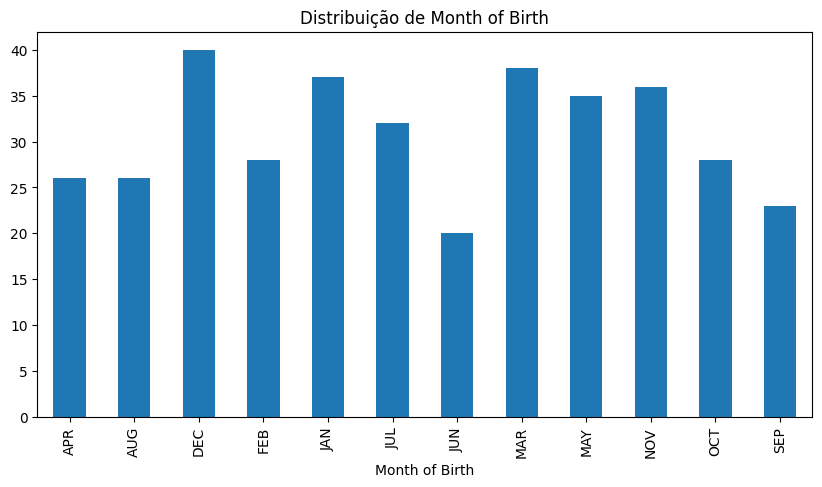

In [ ]:
# Verificar distribuição
plt.figure(figsize=(10, 5))
db['Month of Birth'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Month of Birth')
plt.show()

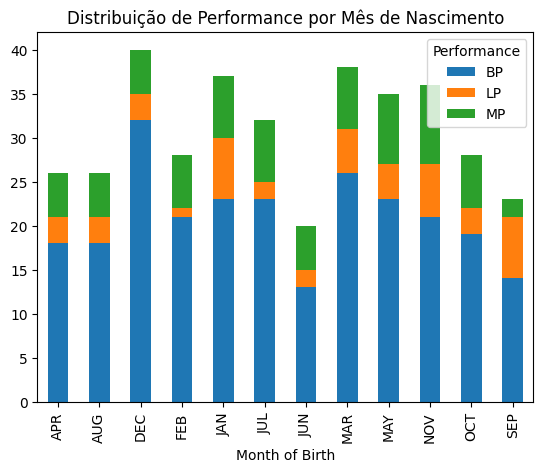

In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db['Month of Birth'], db['Performance']).plot(kind='bar', stacked=True)
plt.title("Distribuição de Performance por Mês de Nascimento")
plt.show()

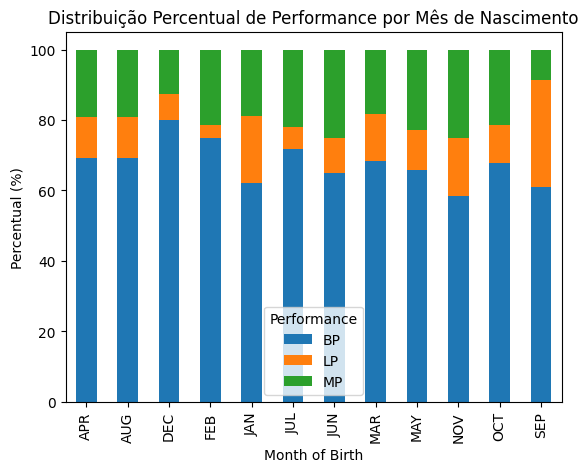

In [ ]:
# Tabela de frequência cruzada normalizada por linha (porcentagem)
(pd.crosstab(db['Month of Birth'], db['Performance'], normalize='index') * 100).plot(kind='bar', stacked=True)
plt.title("Distribuição Percentual de Performance por Mês de Nascimento")
plt.ylabel("Percentual (%)")
plt.show()

In [ ]:
# Month of Birth vs Performance
contingency_mob = pd.crosstab(db['Month of Birth'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_mob)
print("Month of Birth vs Performance - p-valor:", p)

Month of Birth vs Performance - p-valor: 0.750662890416647


### Análise para Gender

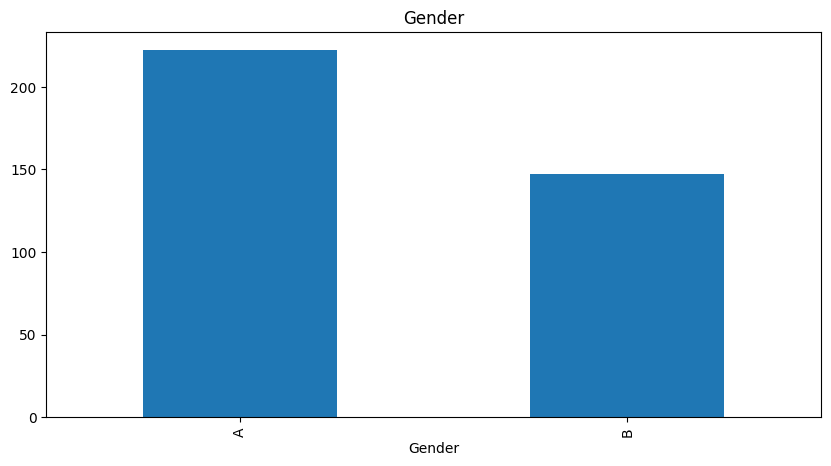

In [ ]:
# Verificar distribuição
plt.figure(figsize=(10, 5))
db['Gender'].value_counts().sort_index().plot(kind='bar')
plt.title('Gender')
plt.show()

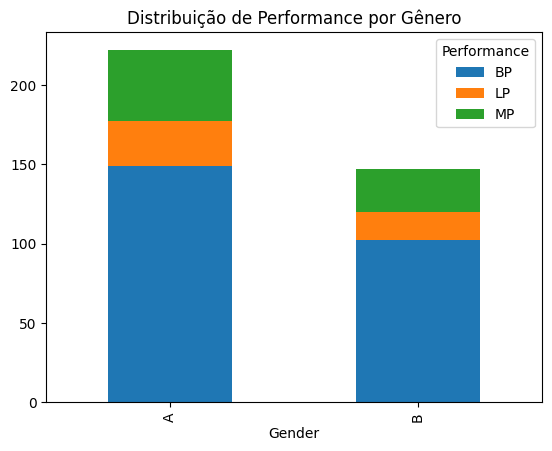

In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db['Gender'], db['Performance']).plot(kind='bar', stacked=True)
plt.title("Distribuição de Performance por Gênero")
plt.show()

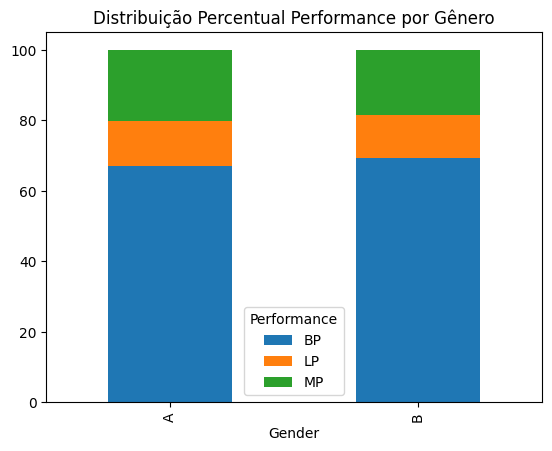

In [ ]:
# Tabela de frequência cruzada
(pd.crosstab(db['Gender'], db['Performance'], normalize='index') * 100).plot(kind='bar', stacked=True)
plt.title("Distribuição Percentual Performance por Gênero")
plt.show()

In [ ]:
# Gender vs Performance
contingency_mob = pd.crosstab(db['Gender'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_mob)
print("Gender vs Performance - p-valor:", p)

Gender vs Performance - p-valor: 0.8865864547411292


### Análise para State (Location)

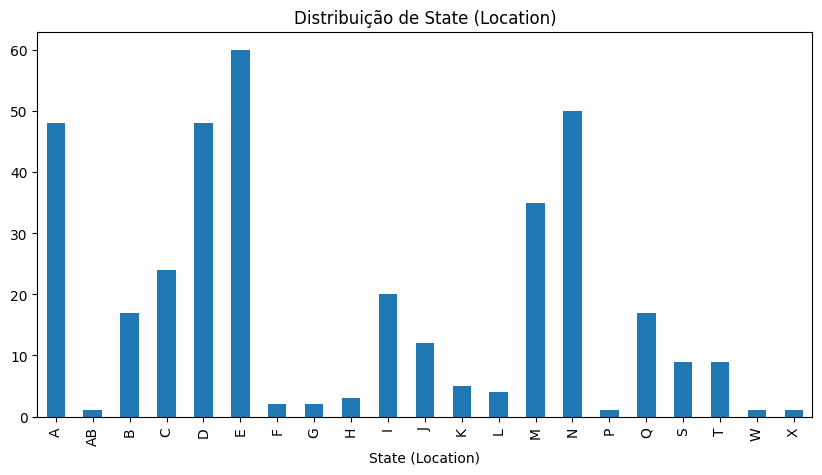

In [ ]:
# Verificar distribuição
plt.figure(figsize=(10, 5))
db['State (Location)'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de State (Location)')
plt.show()

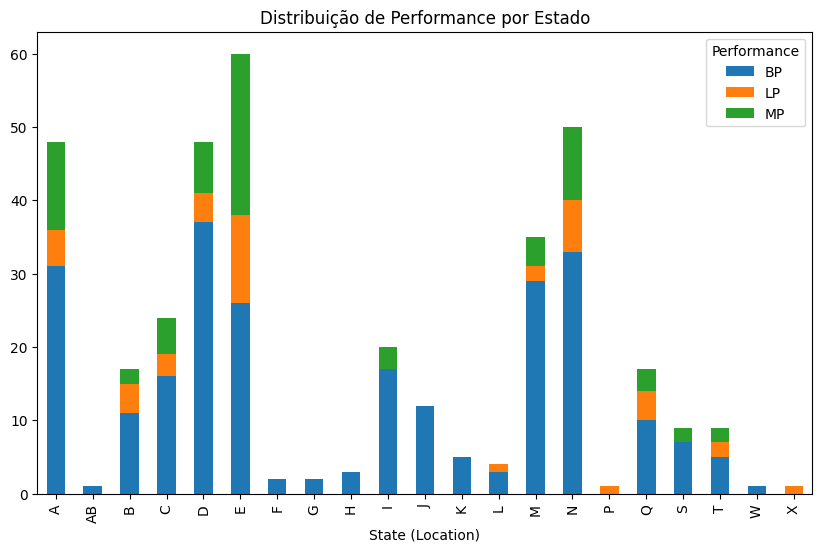

In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db['State (Location)'], db['Performance']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Distribuição de Performance por Estado")
plt.show()

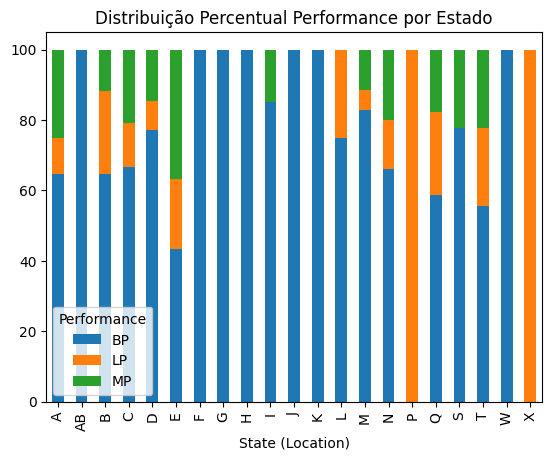

In [ ]:
# Tabela de frequência cruzada
(pd.crosstab(db['State (Location)'], db['Performance'], normalize='index') * 100).plot(kind='bar', stacked=True)
plt.title("Distribuição Percentual Performance por Estado")
plt.show()

In [ ]:
# State vs Performance
contingency_state = pd.crosstab(db['State (Location)'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_state)
print("State vs Performance - p-valor:", p)

State vs Performance - p-valor: 0.017103193303829145


### Análise para Degree of study

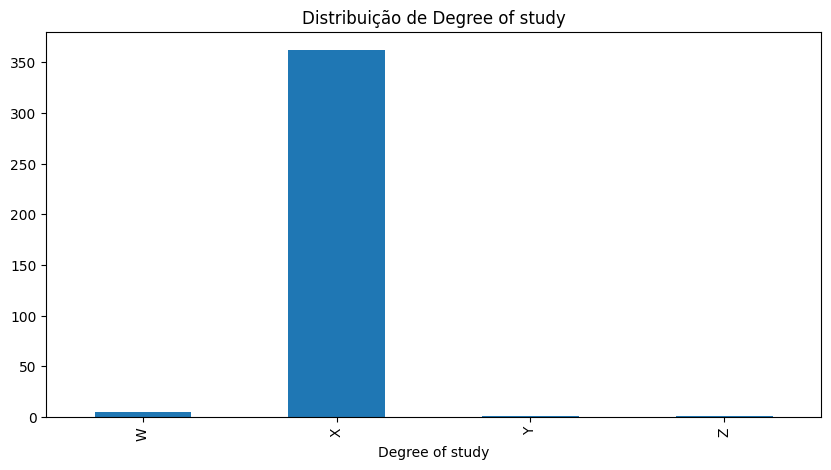

In [ ]:
# Verificar distribuição
plt.figure(figsize=(10, 5))
db['Degree of study'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Degree of study')
plt.show()

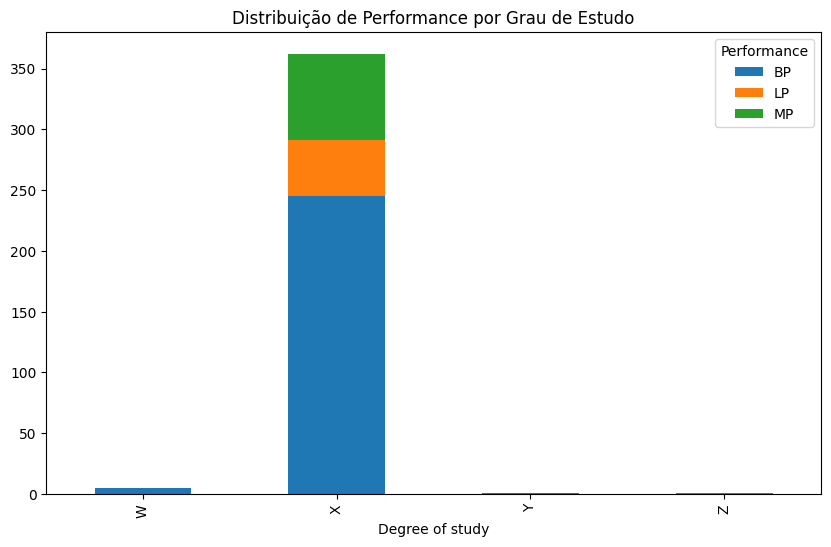

In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db['Degree of study'], db['Performance']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Distribuição de Performance por Grau de Estudo")
plt.show()

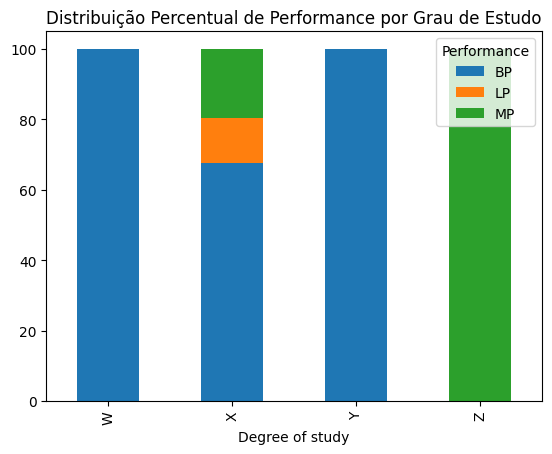

In [ ]:
# Tabela de frequência cruzada
(pd.crosstab(db['Degree of study'], db['Performance'], normalize='index') * 100).plot(kind='bar', stacked=True)
plt.title("Distribuição Percentual de Performance por Grau de Estudo")
plt.show()

In [ ]:
# Degree of study vs Performance
contingency_state = pd.crosstab(db['Degree of study'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_state)
print("Degree of study vs Performance - p-valor:", p)

Degree of study vs Performance - p-valor: 0.32356394105950825


### Análise para Specialization in study

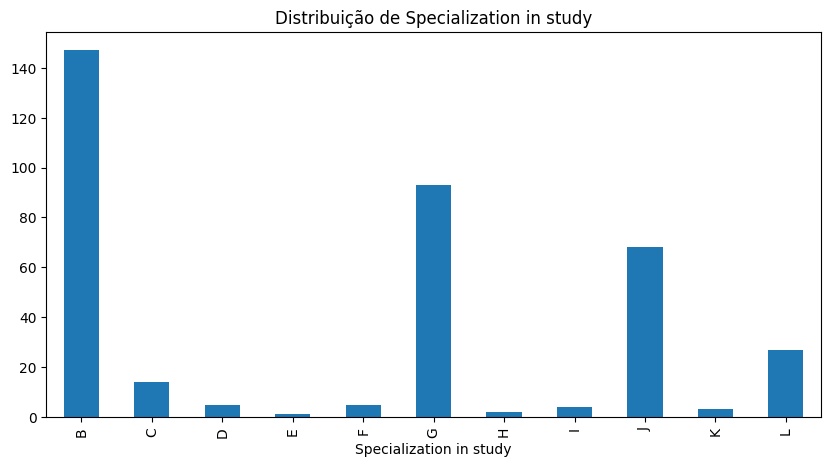

In [ ]:
# Verificar distribuição
plt.figure(figsize=(10, 5))
db['Specialization in study'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Specialization in study')
plt.show()

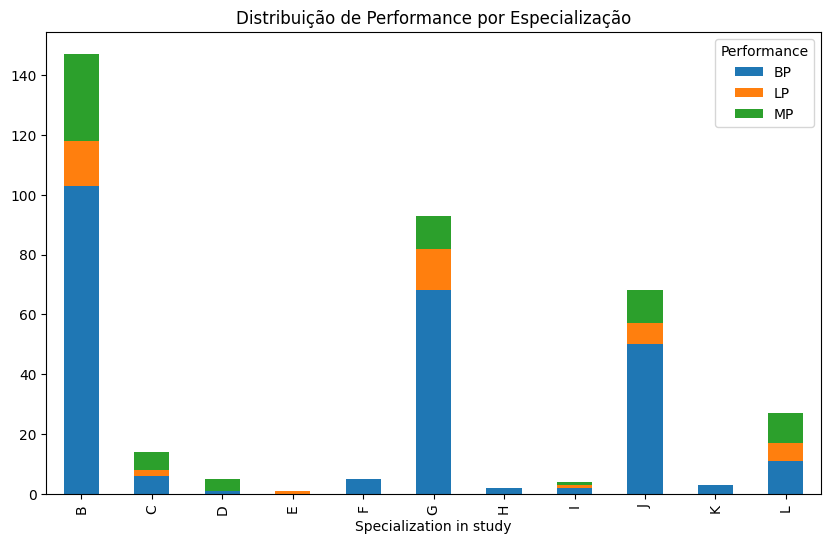

In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db['Specialization in study'], db['Performance']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Distribuição de Performance por Especialização")
plt.show()

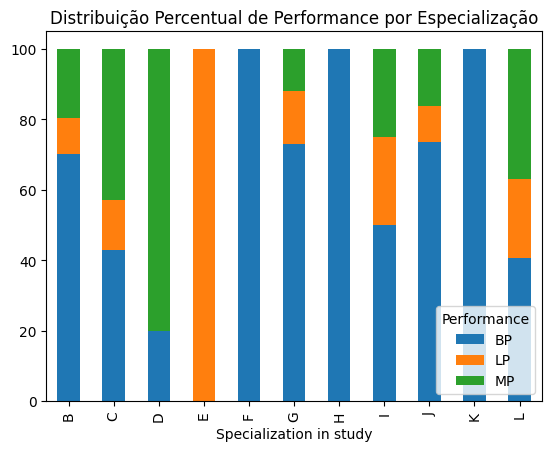

In [ ]:
# Tabela de frequência cruzada
(pd.crosstab(db['Specialization in study'], db['Performance'], normalize='index') * 100).plot(kind='bar', stacked=True)
plt.title("Distribuição Percentual de Performance por Especialização")
plt.show()

In [ ]:
# Specialization in study vs Performance
contingency_state = pd.crosstab(db['Specialization in study'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_state)
print("Specialization vs Performance - p-valor:", p)

Specialization vs Performance - p-valor: 0.0015027182325321308


### Comparação com notas

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


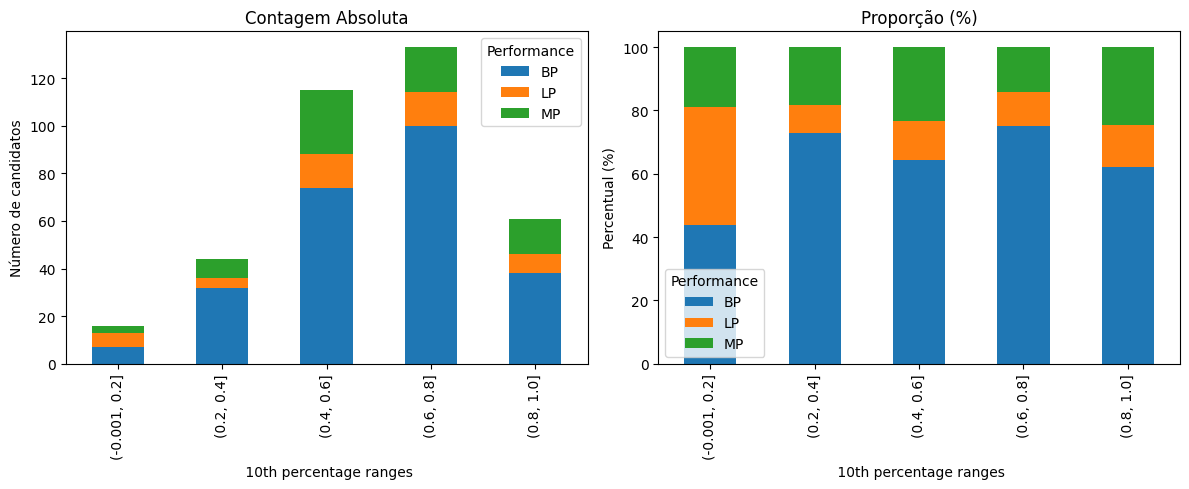

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


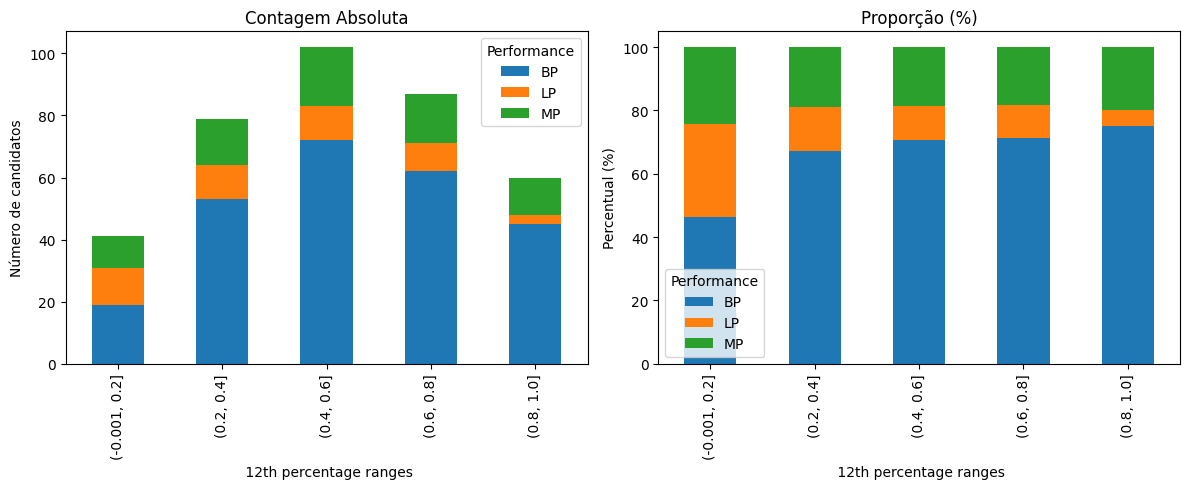

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


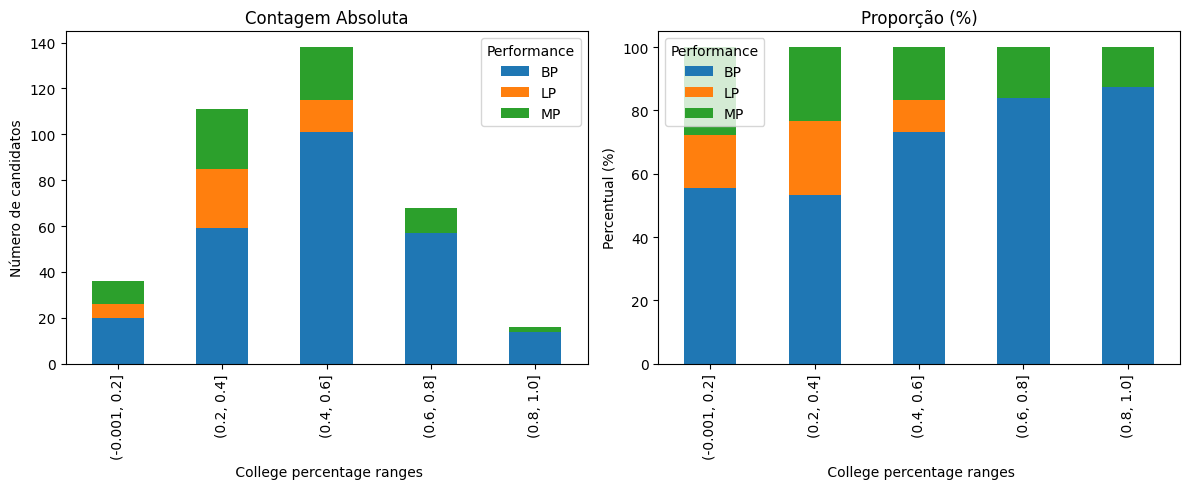

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


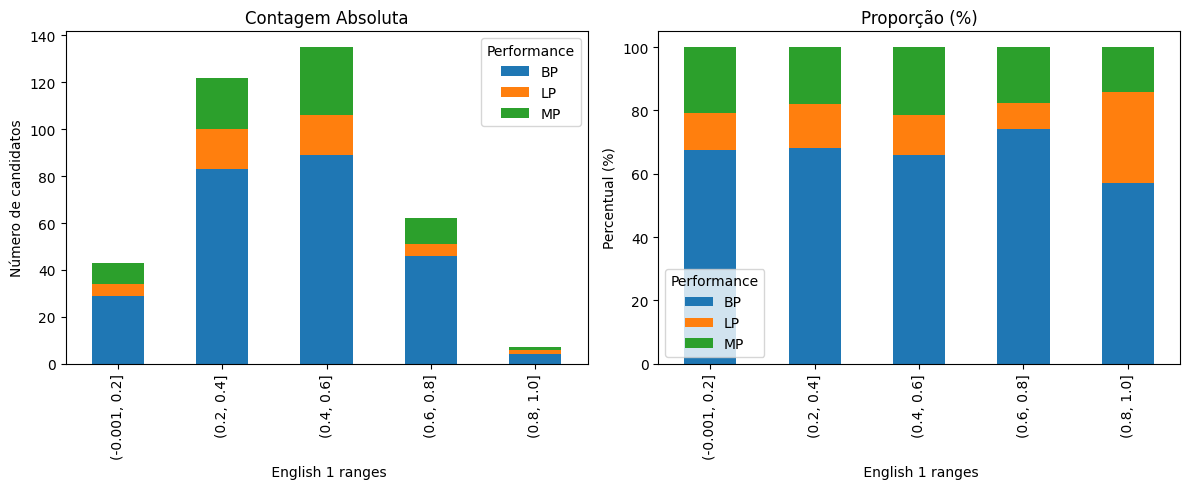

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


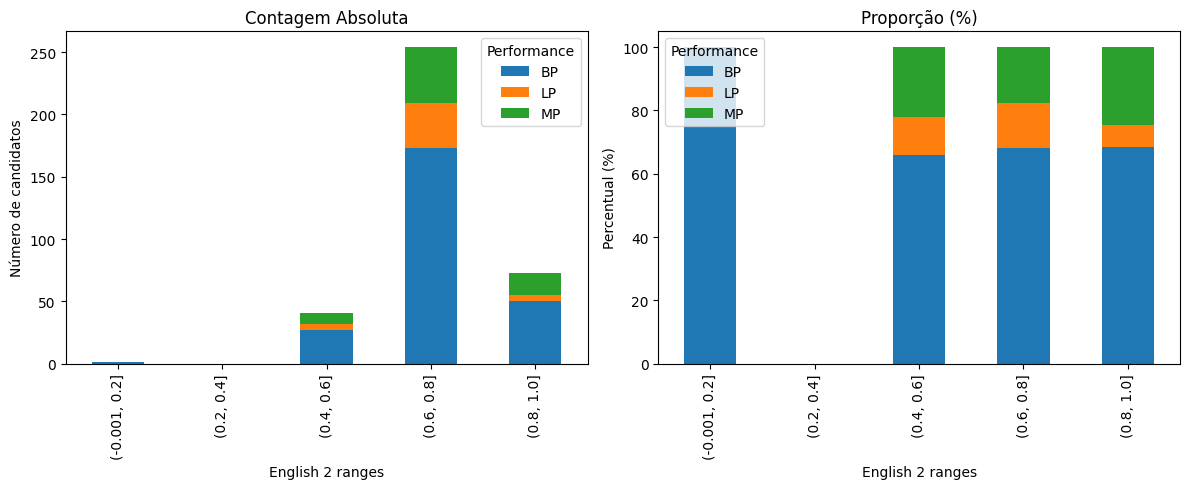

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


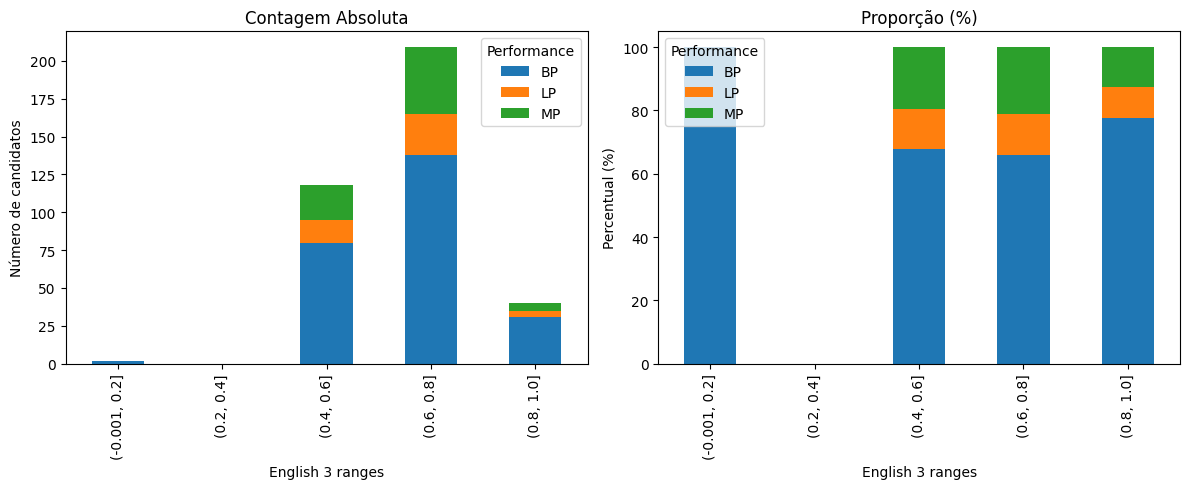

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


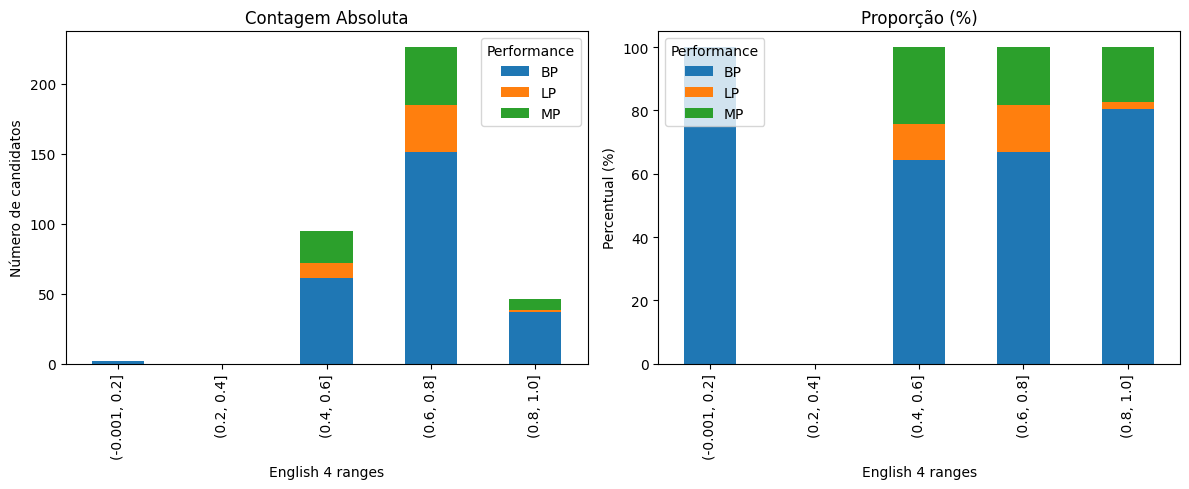

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


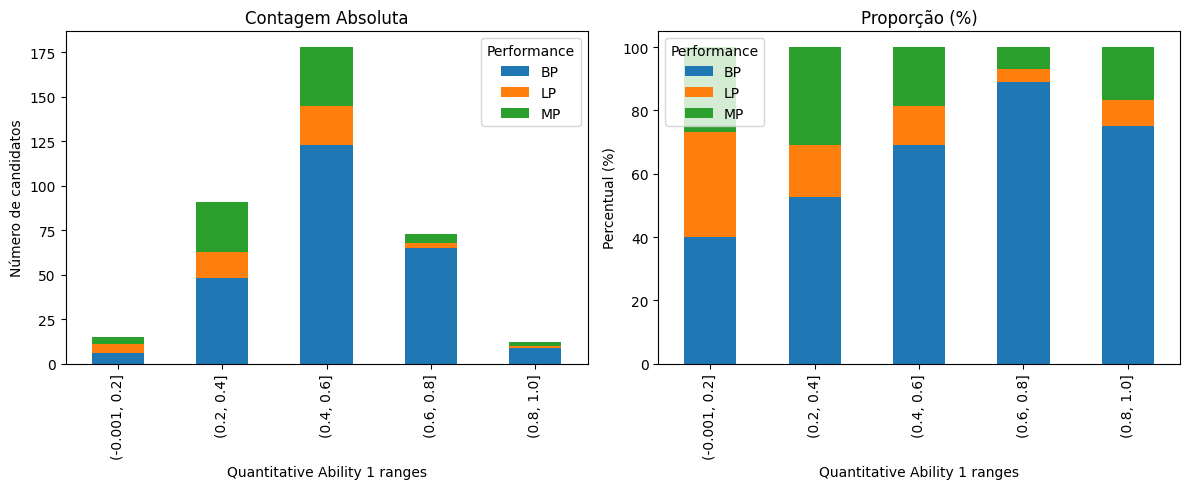

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


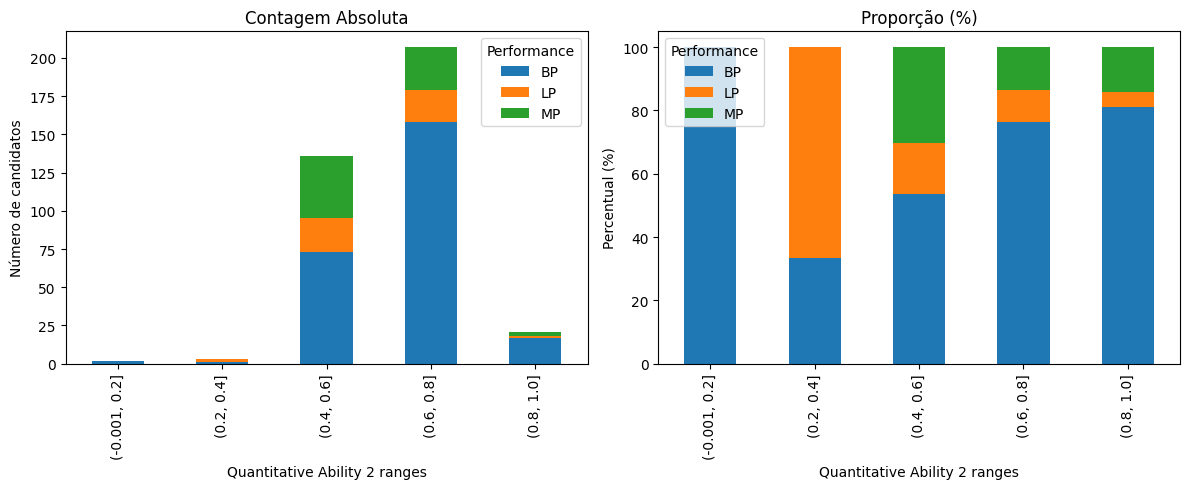

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


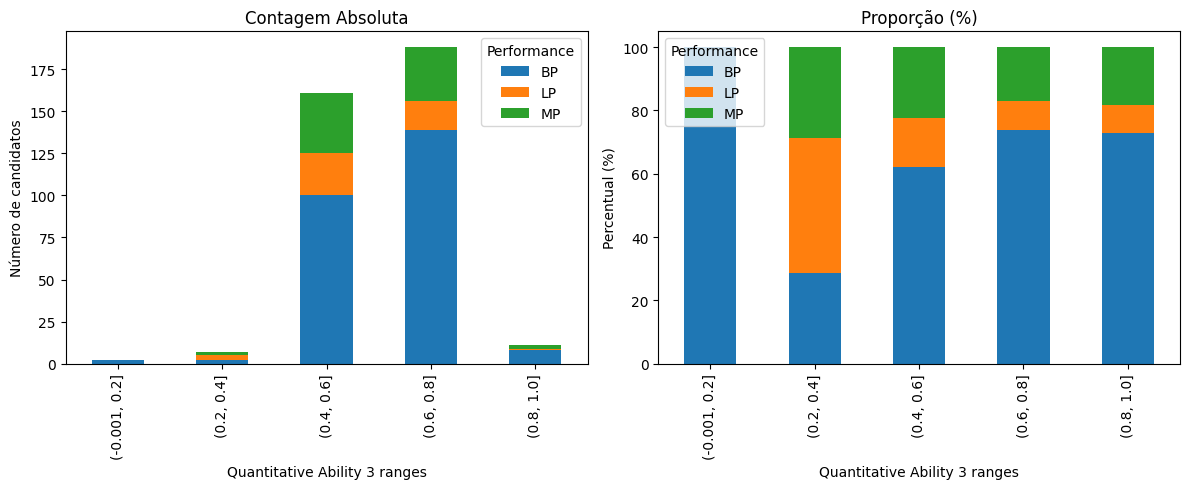

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


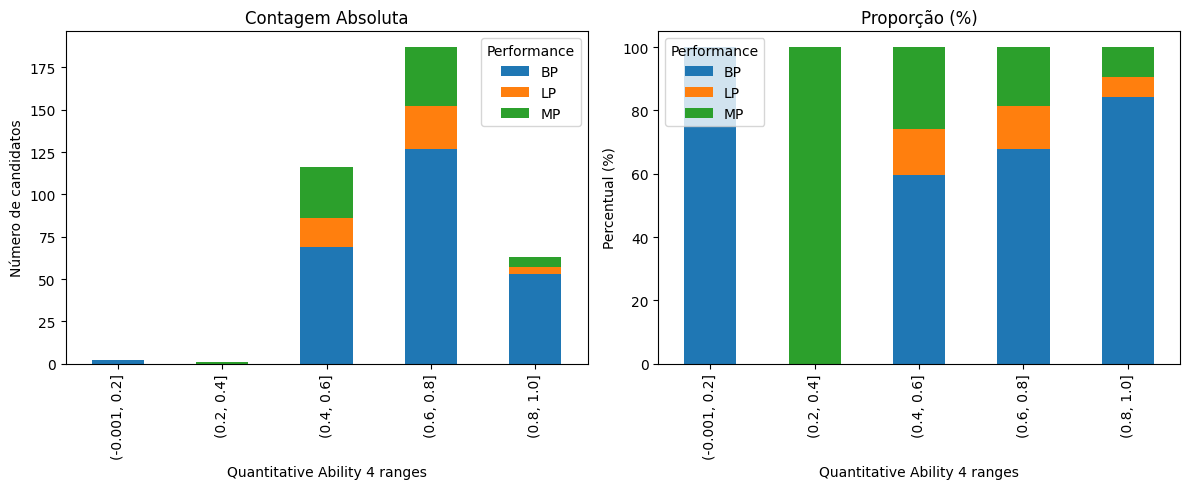

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


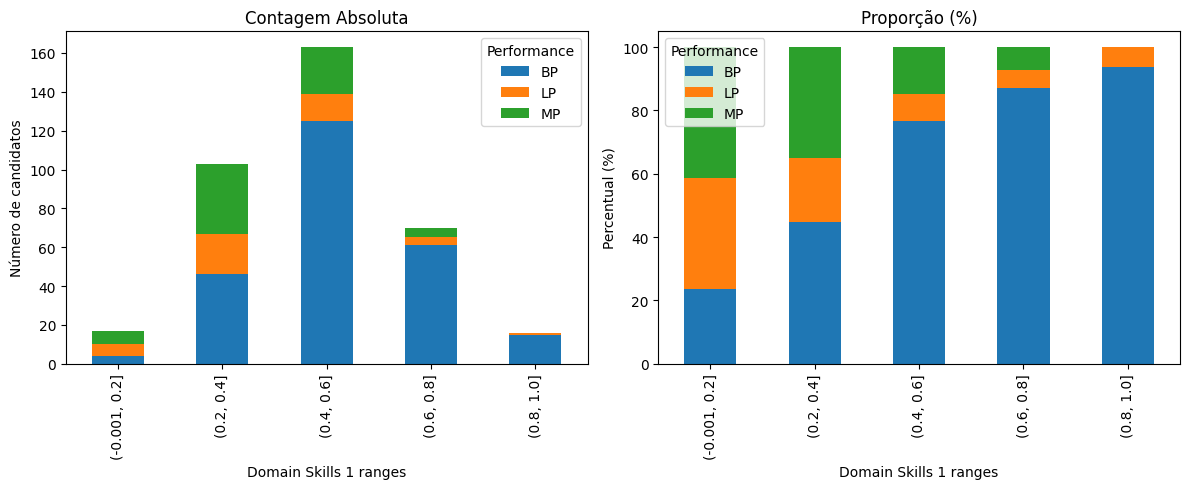

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


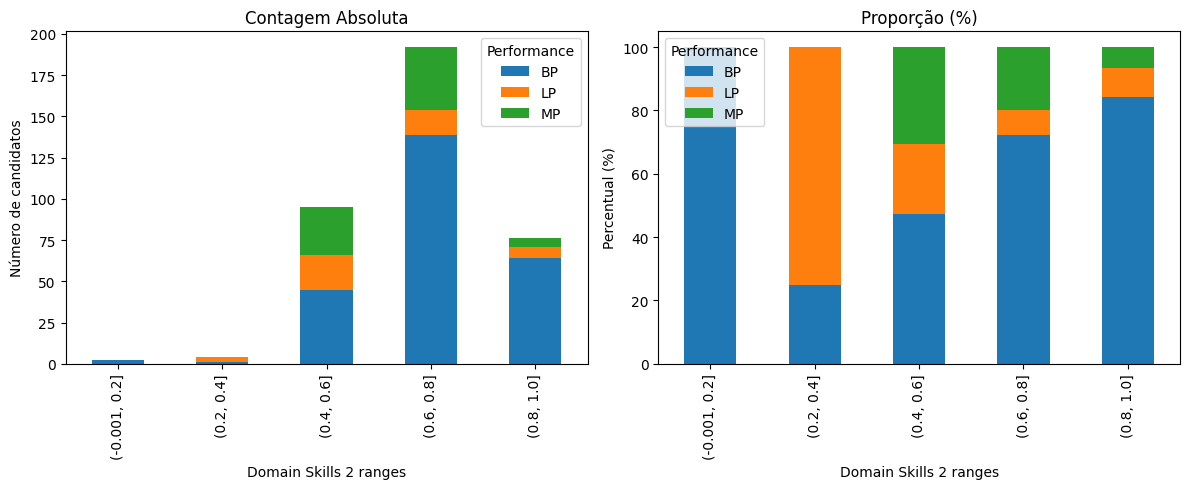

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


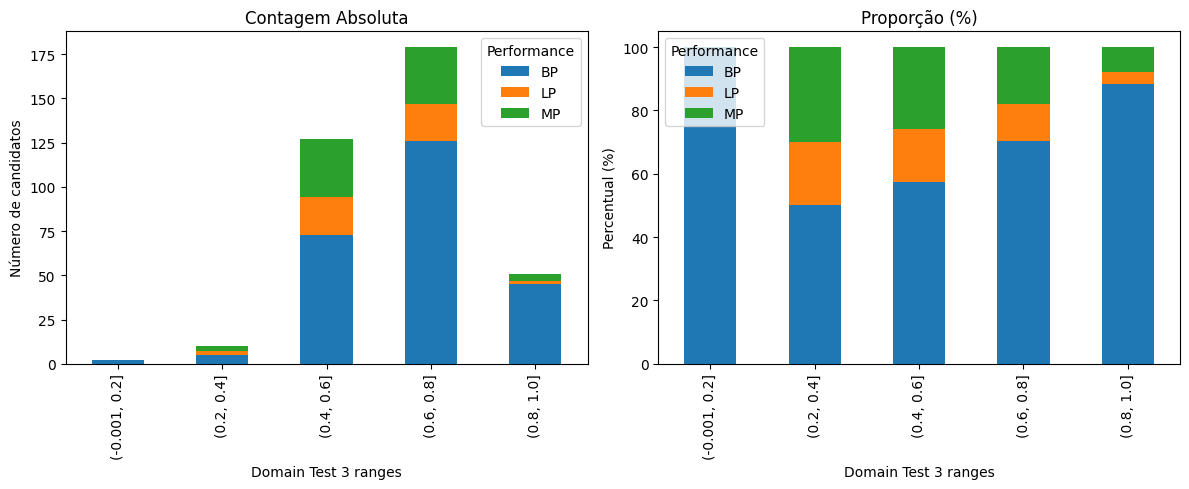

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


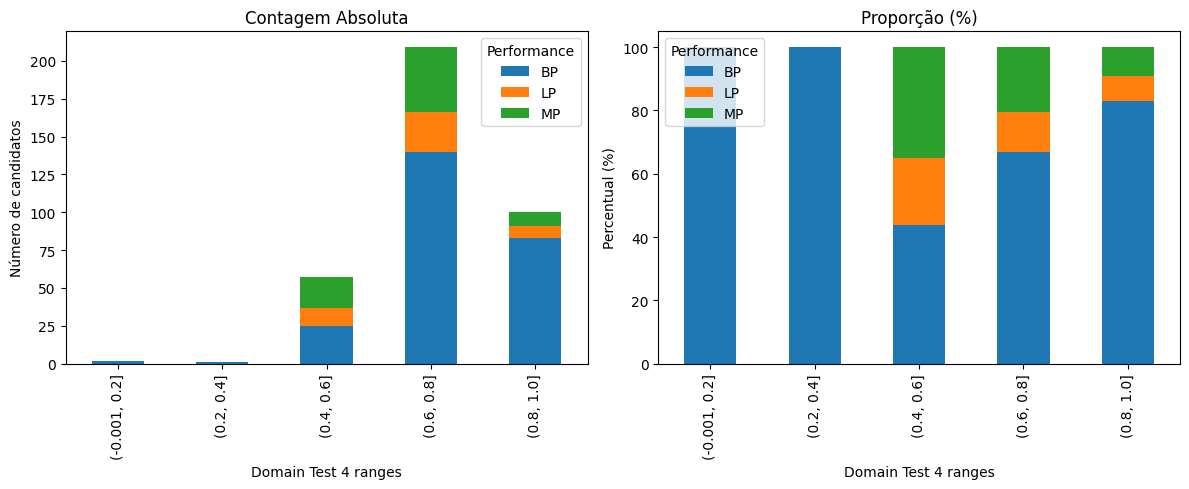

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


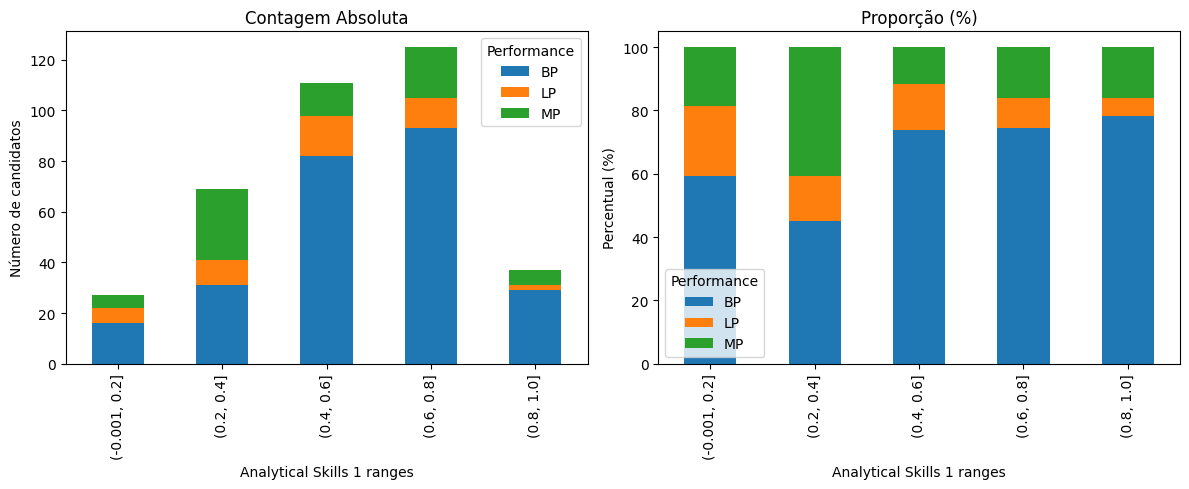

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


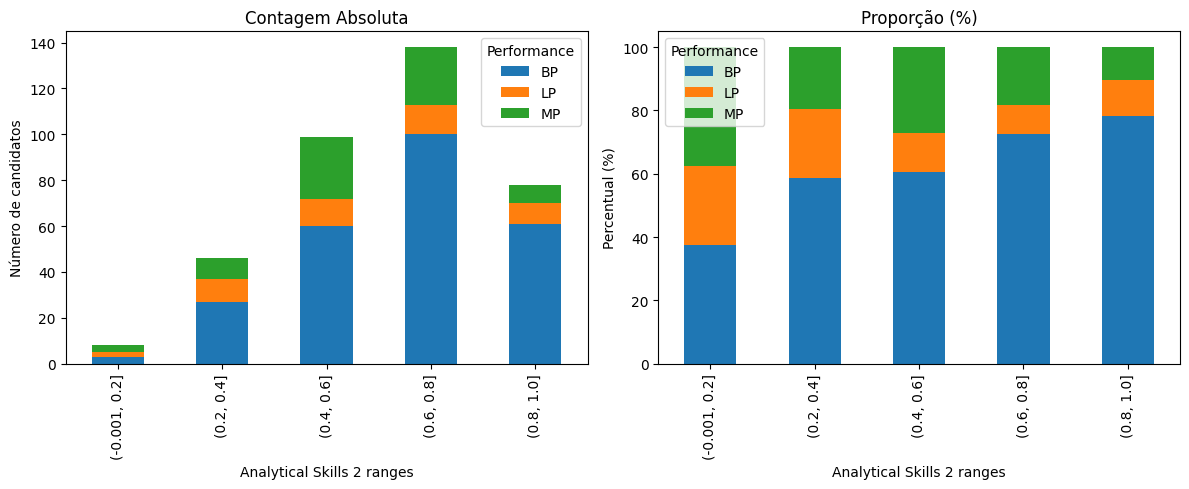

/tmp/ipython-input-1149390241.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
/tmp/ipython-input-1149390241.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()


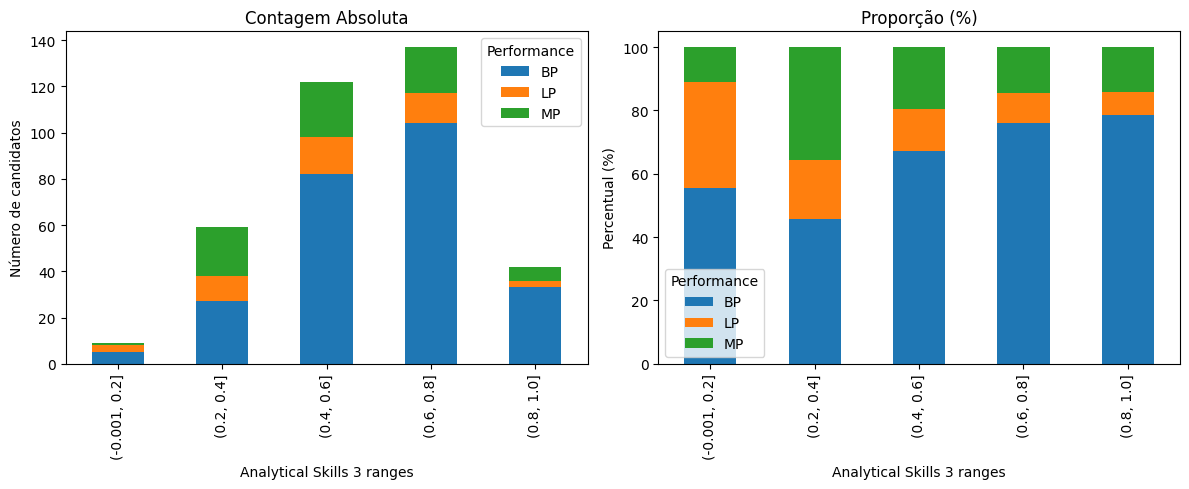

In [ ]:
def sbpr(var):
    range_var = f'{var} ranges'
    db[range_var] = pd.cut(db[var], bins=5)  # 5 intervalos por exemplo

    # Calcular proporção de cada performance por bin
    contagem = db.groupby(range_var)['Performance'].value_counts().unstack()
    prob = (db.groupby(range_var)['Performance'].value_counts(normalize=True) * 100).unstack()

    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # Gráfico absoluto
    contagem.plot(kind='bar', ax=axes[0], stacked=True)
    axes[0].set_title('Contagem Absoluta')
    axes[0].set_ylabel('Número de candidatos')

    # Gráfico proporcional
    prob.plot(kind='bar', ax=axes[1], stacked=True)
    axes[1].set_title('Proporção (%)')
    axes[1].set_ylabel('Percentual (%)')

    plt.tight_layout()
    plt.show()

for variable in [' 10th percentage', ' 12th percentage', ' College percentage', ' English 1', 'English 2', 'English 3', 'English 4', 'Quantitative Ability 1', 'Quantitative Ability 2', 'Quantitative Ability 3', 'Quantitative Ability 4', 'Domain Skills 1', 'Domain Skills 2', 'Domain Test 3', 'Domain Test 4', 'Analytical Skills 1', 'Analytical Skills 2', 'Analytical Skills 3']:
  sbpr(variable)

### Conclusão

In [ ]:
# Remoção de Month of Birth, Gender e Degree of study
remove_columns = ['Month of Birth', 'Gender', 'Degree of study']
db = db.drop(columns=remove_columns)

db.head()

,Number of characters in Original Name,Year of Birth,State (Location),10th percentage,12th percentage,10th Completion Year,12th Completion year,Specialization in study,College percentage,Year of Completion of college,...,Quantitative Ability 2 ranges,Quantitative Ability 3 ranges,Quantitative Ability 4 ranges,Domain Skills 1 ranges,Domain Skills 2 ranges,Domain Test 3 ranges,Domain Test 4 ranges,Analytical Skills 1 ranges,Analytical Skills 2 ranges,Analytical Skills 3 ranges
0,13,Y7,N,0.619952,0.628415,Y13,Y15,B,0.169842,Y20,...,"(0.6, 0.8]","(0.6, 0.8]","(0.6, 0.8]","(0.4, 0.6]","(0.6, 0.8]","(0.6, 0.8]","(0.6, 0.8]","(0.8, 1.0]","(0.6, 0.8]","(0.8, 1.0]"
1,11,Y7,D,0.637767,0.437158,Y14,Y16,B,0.491018,Y20,...,"(0.4, 0.6]","(0.4, 0.6]","(0.6, 0.8]","(0.4, 0.6]","(0.6, 0.8]","(0.6, 0.8]","(0.6, 0.8]","(0.4, 0.6]","(0.8, 1.0]","(0.4, 0.6]"
2,13,Y8,N,0.692993,0.050000,Y14,Y16,G,0.226728,Y20,...,"(0.2, 0.4]","(0.4, 0.6]","(0.4, 0.6]","(0.4, 0.6]","(0.4, 0.6]","(0.6, 0.8]","(0.6, 0.8]","(0.4, 0.6]","(0.6, 0.8]","(0.2, 0.4]"
3,12,Y8,F,0.536817,0.300546,Y14,Y16,B,0.634731,Y20,...,"(0.4, 0.6]","(0.4, 0.6]","(0.4, 0.6]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.4, 0.6]","(0.2, 0.4]","(0.6, 0.8]","(0.2, 0.4]"
4,25,Y7,E,0.000000,0.191257,Y14,Y16,K,0.164398,Y20,...,"(0.6, 0.8]","(0.2, 0.4]","(0.6, 0.8]","(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.2, 0.4]","(0.4, 0.6]","(0.2, 0.4]"


In [ ]:
db.shape

(369, 44)

## Análise de Variáveis Temporais

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 467
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Number of characters in Original Name  369 non-null    int64   
 1   Year of Birth                          369 non-null    object  
 2   State (Location)                       369 non-null    object  
 3    10th percentage                       369 non-null    float64 
 4    12th percentage                       369 non-null    float64 
 5   10th Completion Year                   369 non-null    object  
 6   12th Completion year                   369 non-null    object  
 7   Specialization in study                369 non-null    object  
 8    College percentage                    369 non-null    float64 
 9    Year of Completion of college         369 non-null    object  
 10   English 1                             369 non-null    float64 
 11

### Como Variável Ordinal

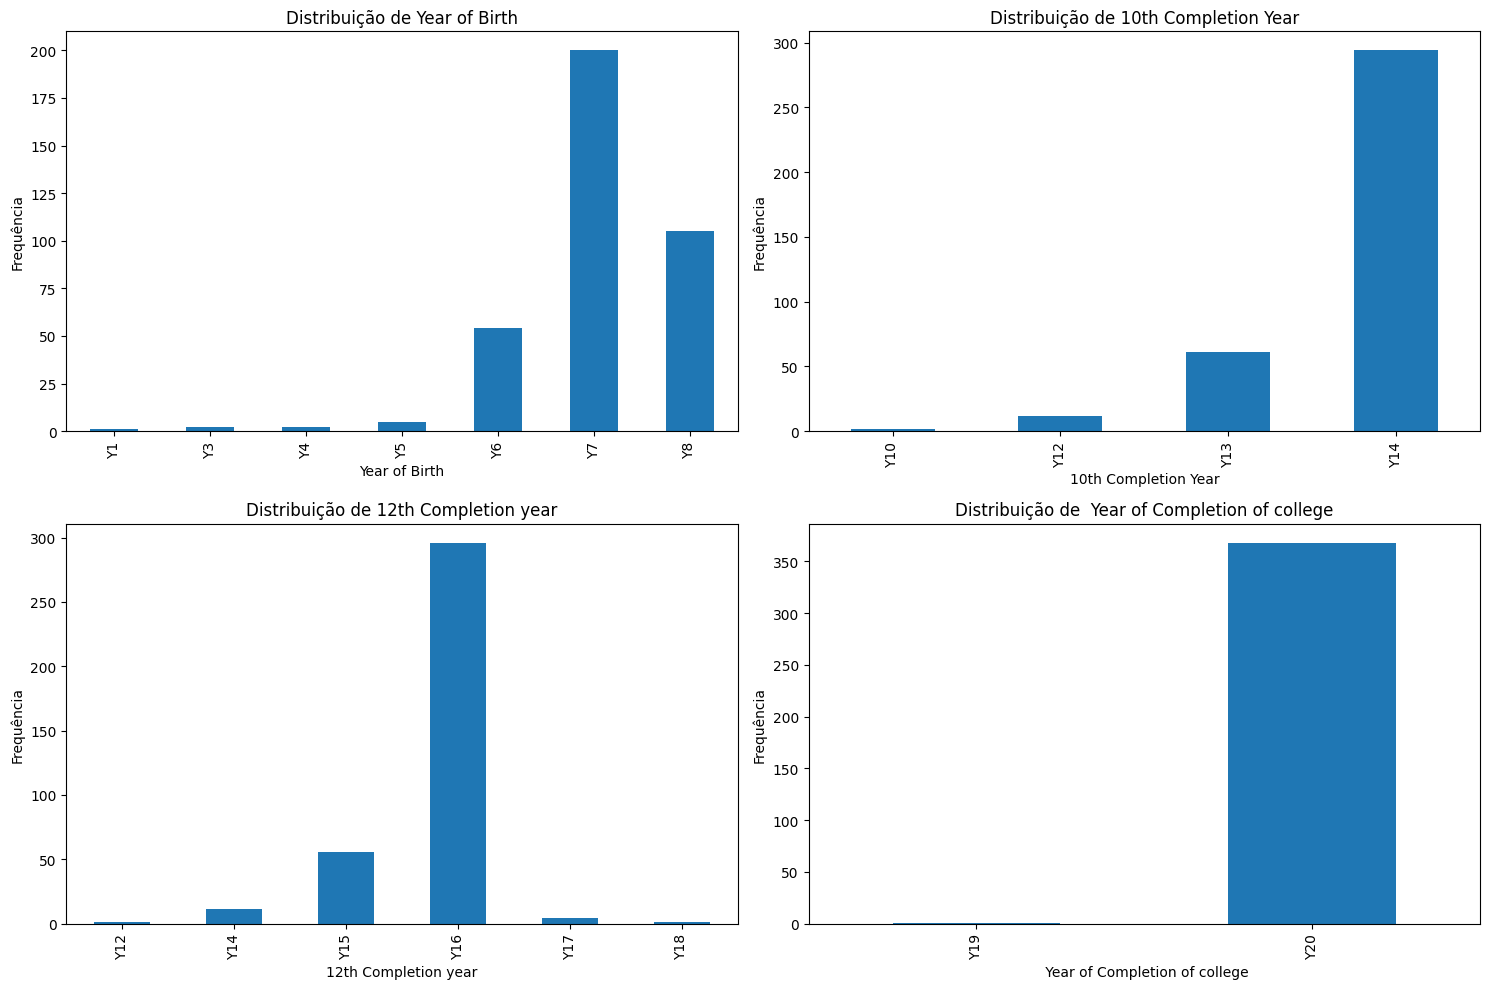

In [ ]:
# Distribuições
year_columns = ['Year of Birth', '10th Completion Year', '12th Completion year', ' Year of Completion of college']

plt.figure(figsize=(15, 10))

for i, column in enumerate(year_columns):
  plt.subplot(2, 2, i + 1)
  db[column].value_counts().sort_index().plot(kind='bar')
  plt.title(f'Distribuição de {column}')
  plt.xlabel(column)
  plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

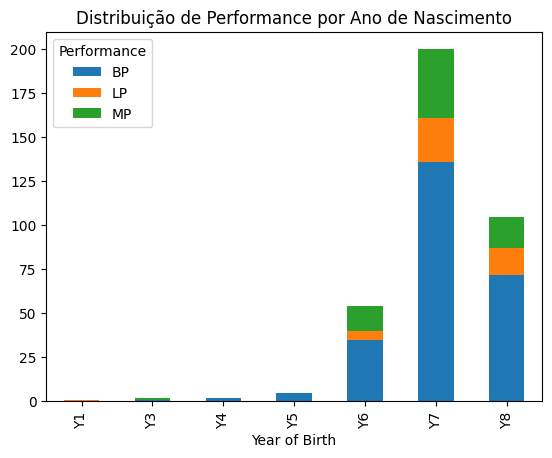

Year of Birth vs Performance - p-valor: 0.30963804515942916


In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db['Year of Birth'], db['Performance']).plot(kind='bar', stacked=True)
plt.title("Distribuição de Performance por Ano de Nascimento")
plt.show()

# Year of Birth vs Performance
contingency_mob = pd.crosstab(db['Year of Birth'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_mob)
print("Year of Birth vs Performance - p-valor:", p)

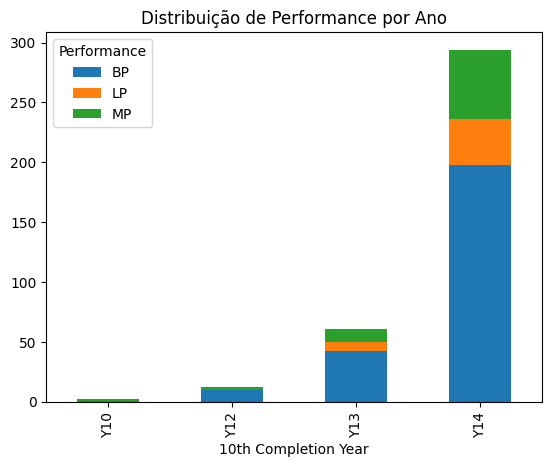

10th Completion Year vs Performance - p-valor: 0.7534604996237813


In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db['10th Completion Year'], db['Performance']).plot(kind='bar', stacked=True)
plt.title("Distribuição de Performance por Ano")
plt.show()

# 10th Completion Year vs Performance
contingency_mob = pd.crosstab(db['10th Completion Year'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_mob)
print("10th Completion Year vs Performance - p-valor:", p)

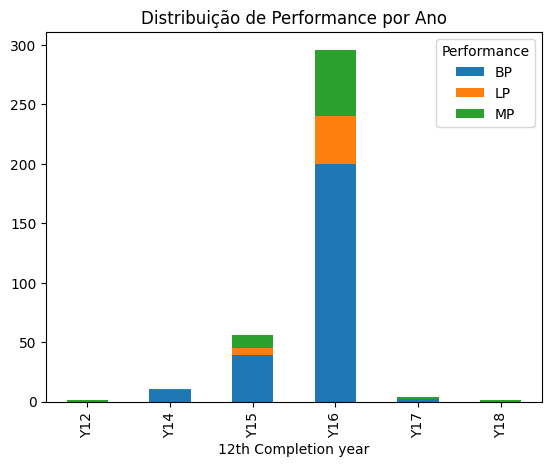

12th Completion year vs Performance - p-valor: 0.1658799406237634


In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db['12th Completion year'], db['Performance']).plot(kind='bar', stacked=True)
plt.title("Distribuição de Performance por Ano")
plt.show()

# 12th Completion year vs Performance
contingency_mob = pd.crosstab(db['12th Completion year'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_mob)
print("12th Completion year vs Performance - p-valor:", p)

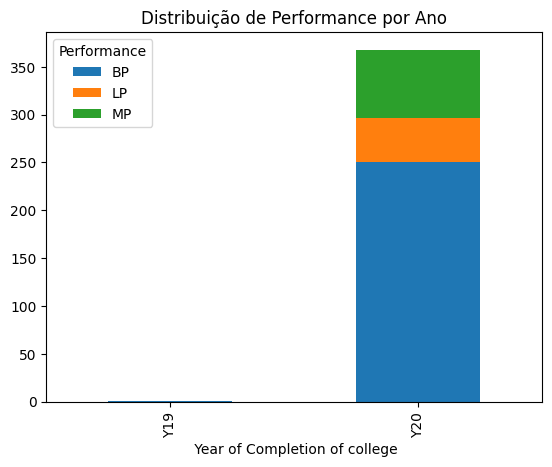

Year of Completion of college vs Performance - p-valor: 0.7900188205636137


In [ ]:
# Tabela de frequência cruzada
pd.crosstab(db[' Year of Completion of college'], db['Performance']).plot(kind='bar', stacked=True)
plt.title("Distribuição de Performance por Ano")
plt.show()

# Year of Completion of college vs Performance
contingency_mob = pd.crosstab(db[' Year of Completion of college'], db['Performance'])
chi2, p, dof, ex = chi2_contingency(contingency_mob)
print("Year of Completion of college vs Performance - p-valor:", p)

### Como Variável Numérica

In [ ]:
def convert_year(x):
  return int(x.replace("Y", ""))

db_years = db.copy()
year_columns = ["Year of Birth", "10th Completion Year", "12th Completion year", " Year of Completion of college"]
for col in year_columns:
  db_years[col] = db_years[col].apply(convert_year)

In [ ]:
db_years.groupby("Performance")[year_columns].mean()

,Year of Birth,10th Completion Year,12th Completion year,Year of Completion of college
Performance,,,,
BP,7.067729,13.737052,15.772908,19.996016
LP,7.086957,13.826087,15.869565,20.000000
MP,7.000000,13.736111,15.819444,20.000000


In [ ]:
db_years["Gap_birth_college"] = db_years[" Year of Completion of college"] - db_years["Year of Birth"]

In [ ]:
db_years.groupby("Performance")[["Gap_birth_college"]].mean()

,Gap_birth_college
Performance,
BP,12.928287
LP,12.913043
MP,13.000000


### Conclusão

In [ ]:
# Remoção dos atributos referentes ao tempo
year_columns = ["Year of Birth", "10th Completion Year", "12th Completion year", " Year of Completion of college"]
db = db.drop(columns=year_columns)

db.head()

,Number of characters in Original Name,State (Location),10th percentage,12th percentage,Specialization in study,College percentage,English 1,English 2,English 3,English 4,...,Quantitative Ability 2 ranges,Quantitative Ability 3 ranges,Quantitative Ability 4 ranges,Domain Skills 1 ranges,Domain Skills 2 ranges,Domain Test 3 ranges,Domain Test 4 ranges,Analytical Skills 1 ranges,Analytical Skills 2 ranges,Analytical Skills 3 ranges
0,13,N,0.619952,0.628415,B,0.169842,0.456522,0.660131,0.672727,0.693252,...,"(0.6, 0.8]","(0.6, 0.8]","(0.6, 0.8]","(0.4, 0.6]","(0.6, 0.8]","(0.6, 0.8]","(0.6, 0.8]","(0.8, 1.0]","(0.6, 0.8]","(0.8, 1.0]"
1,11,D,0.637767,0.437158,B,0.491018,0.239130,0.660131,0.612121,0.558282,...,"(0.4, 0.6]","(0.4, 0.6]","(0.6, 0.8]","(0.4, 0.6]","(0.6, 0.8]","(0.6, 0.8]","(0.6, 0.8]","(0.4, 0.6]","(0.8, 1.0]","(0.4, 0.6]"
2,13,N,0.692993,0.050000,G,0.226728,0.347826,0.712418,0.648485,0.619632,...,"(0.2, 0.4]","(0.4, 0.6]","(0.4, 0.6]","(0.4, 0.6]","(0.4, 0.6]","(0.6, 0.8]","(0.6, 0.8]","(0.4, 0.6]","(0.6, 0.8]","(0.2, 0.4]"
3,12,F,0.536817,0.300546,B,0.634731,0.565217,0.908497,0.757576,0.668712,...,"(0.4, 0.6]","(0.4, 0.6]","(0.4, 0.6]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.4, 0.6]","(0.2, 0.4]","(0.6, 0.8]","(0.2, 0.4]"
4,25,E,0.000000,0.191257,K,0.164398,0.434783,0.633987,0.575758,0.779141,...,"(0.6, 0.8]","(0.2, 0.4]","(0.6, 0.8]","(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.2, 0.4]","(0.4, 0.6]","(0.2, 0.4]"


## Análise de Variáveis Numéricas

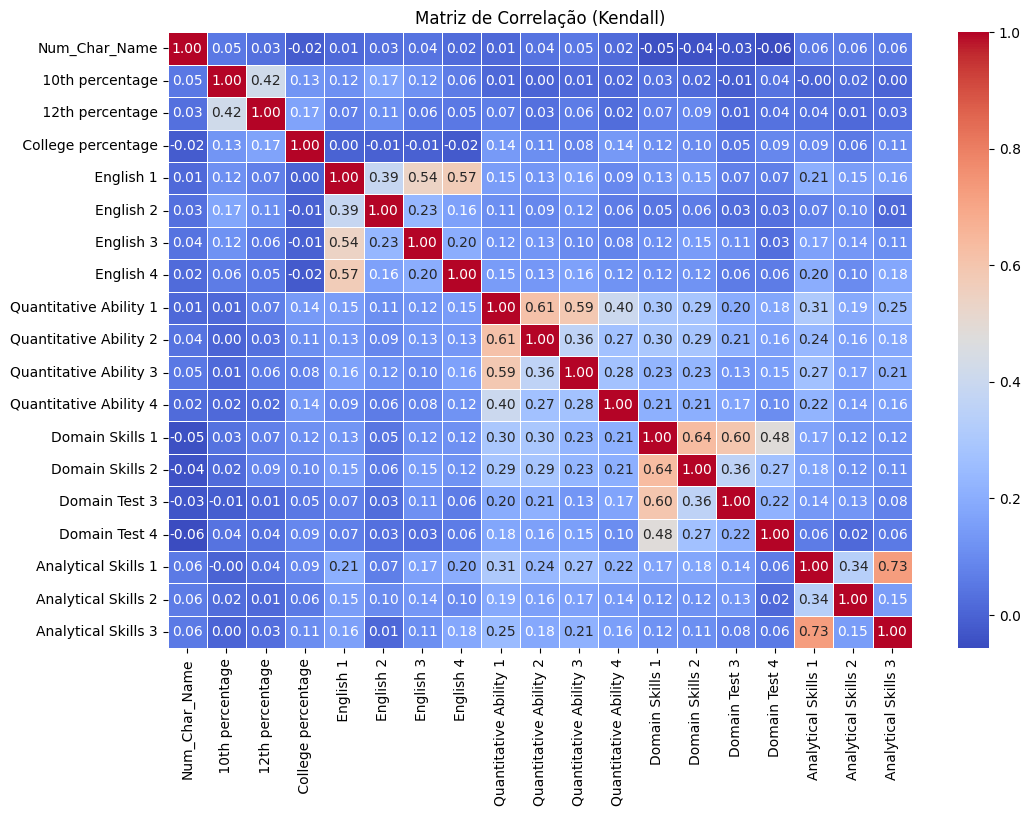

In [ ]:
db = db.rename(columns={'Number of characters in Original Name': 'Num_Char_Name'})
corr = db[["Num_Char_Name", " 10th percentage",  " 12th percentage", " College percentage", " English 1", "English 2", "English 3", "English 4", "Quantitative Ability 1", "Quantitative Ability 2", "Quantitative Ability 3", "Quantitative Ability 4", "Domain Skills 1", "Domain Skills 2", "Domain Test 3", "Domain Test 4", "Analytical Skills 1", "Analytical Skills 2", "Analytical Skills 3"]].corr(method='kendall')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90)
plt.title("Matriz de Correlação (Kendall)")
plt.show()

# Análises Após Pré-processamento

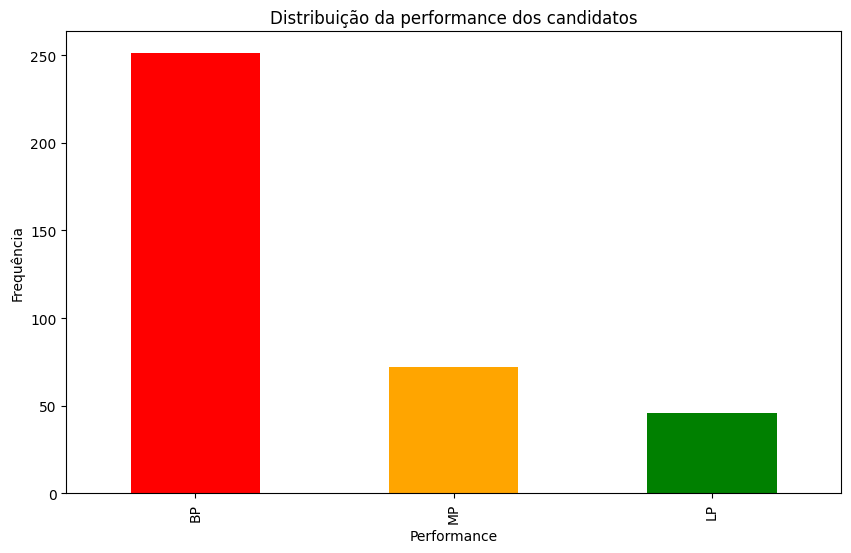

In [ ]:
# Análise da distribuição da // variável alvo // (performance)
plt.figure(figsize=(10, 6))
db['Performance'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribuição da performance dos candidatos')
plt.xlabel('Performance')
plt.ylabel('Frequência')
plt.show()

## Variável Number of characters in Original Name

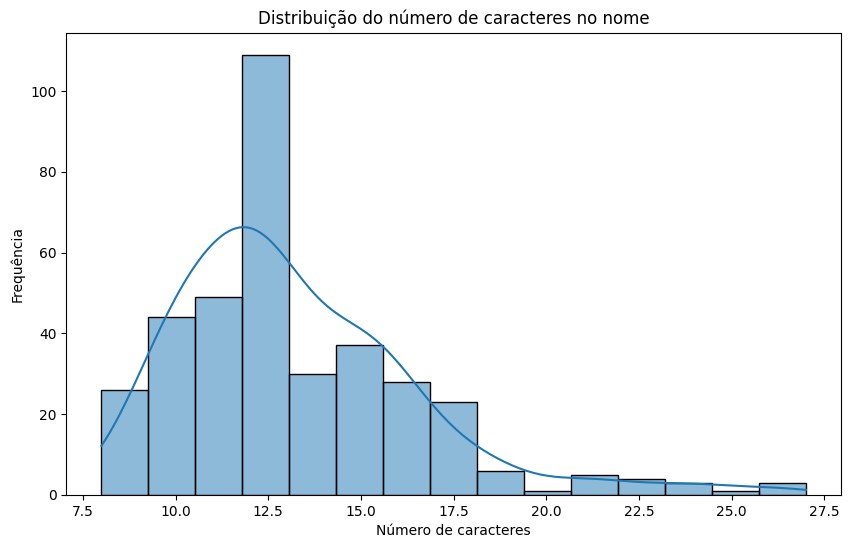

In [ ]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(db["Num_Char_Name"], bins=15, kde=True)
plt.title("Distribuição do número de caracteres no nome")
plt.xlabel("Número de caracteres")
plt.ylabel("Frequência")
plt.show()

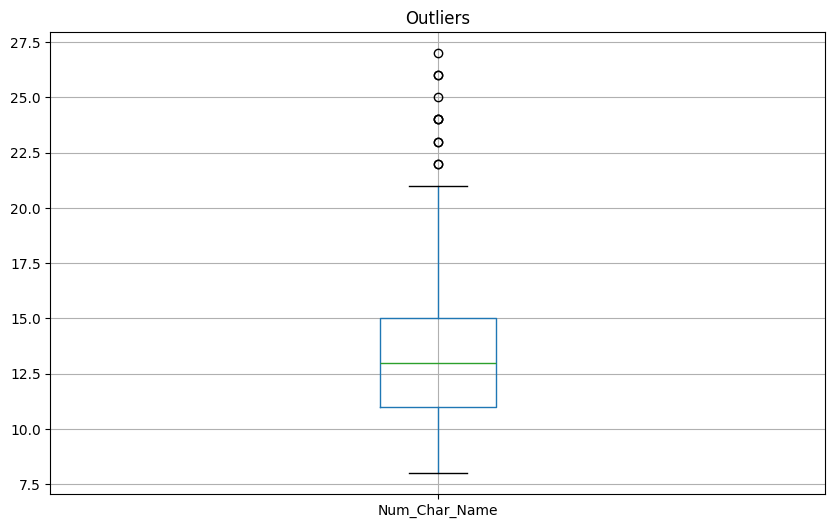

In [ ]:
# Utilização de boxplots para identificar outliers nas variáveis numéricas
plt.figure(figsize=(10, 6))
db[["Num_Char_Name"]].boxplot()
plt.title('Outliers')
plt.show()

In [ ]:
print(db.groupby("Performance")["Num_Char_Name"].median())

Performance
BP    12.0
LP    12.0
MP    13.0
Name: Num_Char_Name, dtype: float64


## Detecção de outliers

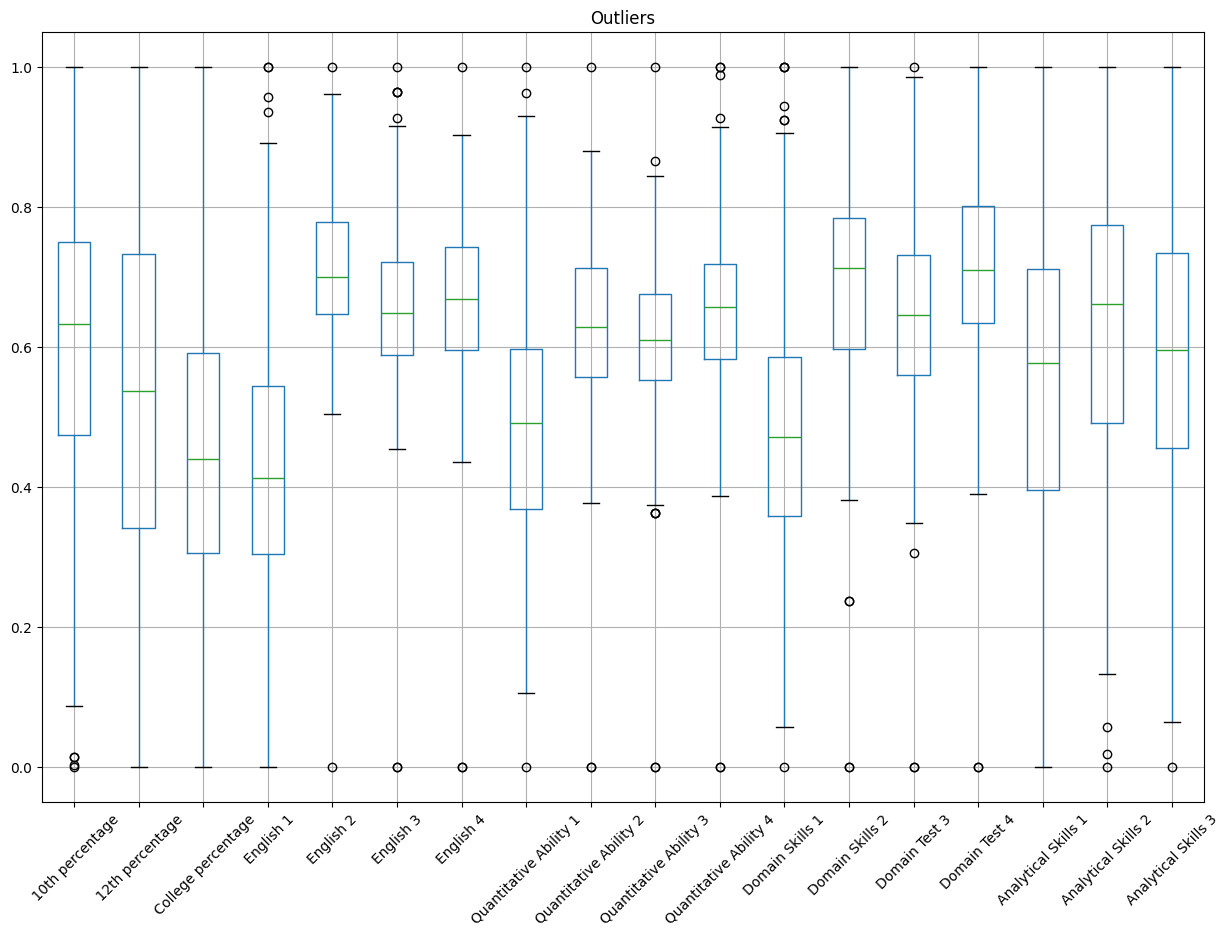

In [ ]:
# Utilização de boxplots para identificar outliers nas variáveis numéricas
numeric_columns = db.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 10))
db[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Outliers')
plt.show()

# **Modificações Após 02/09 - Não considerar**

## Normalização da variável Number of characters ...

In [ ]:
# Identificar colunas com ' ranges'
range_columns = [col for col in db.columns if ' ranges' in col]

# Remover as colunas
db = db.drop(columns=range_columns)

print("Colunas removidas:")
print(range_columns)
print("\nPrimeiras linhas do DataFrame após a remoção:")
display(db.head())

Colunas removidas:
[' 10th percentage ranges', ' 12th percentage ranges', ' College percentage ranges', ' English 1 ranges', 'English 2 ranges', 'English 3 ranges', 'English 4 ranges', 'Quantitative Ability 1 ranges', 'Quantitative Ability 2 ranges', 'Quantitative Ability 3 ranges', 'Quantitative Ability 4 ranges', 'Domain Skills 1 ranges', 'Domain Skills 2 ranges', 'Domain Test 3 ranges', 'Domain Test 4 ranges', 'Analytical Skills 1 ranges', 'Analytical Skills 2 ranges', 'Analytical Skills 3 ranges']

Primeiras linhas do DataFrame após a remoção:


,Num_Char_Name,State (Location),10th percentage,12th percentage,Specialization in study,College percentage,English 1,English 2,English 3,English 4,...,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance
0,13,N,0.619952,0.628415,B,0.169842,0.456522,0.660131,0.672727,0.693252,...,0.653631,0.668712,0.452830,0.683453,0.702128,0.618321,0.921053,0.773585,0.949367,BP
1,11,D,0.637767,0.437158,B,0.491018,0.239130,0.660131,0.612121,0.558282,...,0.564246,0.693252,0.471698,0.669065,0.702128,0.633588,0.578947,0.886792,0.518987,BP
2,13,N,0.692993,0.050000,G,0.226728,0.347826,0.712418,0.648485,0.619632,...,0.508380,0.558282,0.433962,0.568345,0.744681,0.679389,0.473684,0.754717,0.253165,BP
3,12,F,0.536817,0.300546,B,0.634731,0.565217,0.908497,0.757576,0.668712,...,0.553073,0.595092,0.320755,0.539568,0.730496,0.526718,0.289474,0.660377,0.291139,BP
4,25,E,0.000000,0.191257,K,0.164398,0.434783,0.633987,0.575758,0.779141,...,0.385475,0.656442,0.150943,0.395683,0.446809,0.648855,0.263158,0.471698,0.341772,BP


In [ ]:
# Normalização com Min-Max (0 a 1)
db_normalized = db.copy()

# Aplicar normalização na coluna Num_Char_Name
scaler = MinMaxScaler(feature_range=(0, 1))
db_normalized[["Num_Char_Name"]] = scaler.fit_transform(db_normalized[["Num_Char_Name"]])

# Verificação
print(db[["Num_Char_Name"][0]].min())
print(db[["Num_Char_Name"][0]].max())
print(db_normalized[["Num_Char_Name"][0]].min())
print(db_normalized[["Num_Char_Name"][0]].max())

8
27
0.0
1.0


## Arrumando os nomes das colunas com espaço extra

In [ ]:
# Remover espaços extras no início dos nomes das colunas
db.columns = [col.strip() for col in db.columns]

# Verificar os nomes das colunas após a remoção dos espaços
print("Nomes das colunas após remover espaços:")
print(db.columns.tolist())

Nomes das colunas após remover espaços:
['Num_Char_Name', 'State (Location)', '10th percentage', '12th percentage', 'Specialization in study', 'College percentage', 'English 1', 'English 2', 'English 3', 'English 4', 'Quantitative Ability 1', 'Quantitative Ability 2', 'Quantitative Ability 3', 'Quantitative Ability 4', 'Domain Skills 1', 'Domain Skills 2', 'Domain Test 3', 'Domain Test 4', 'Analytical Skills 1', 'Analytical Skills 2', 'Analytical Skills 3', 'Performance']


## Matriz de correlação de Spearman

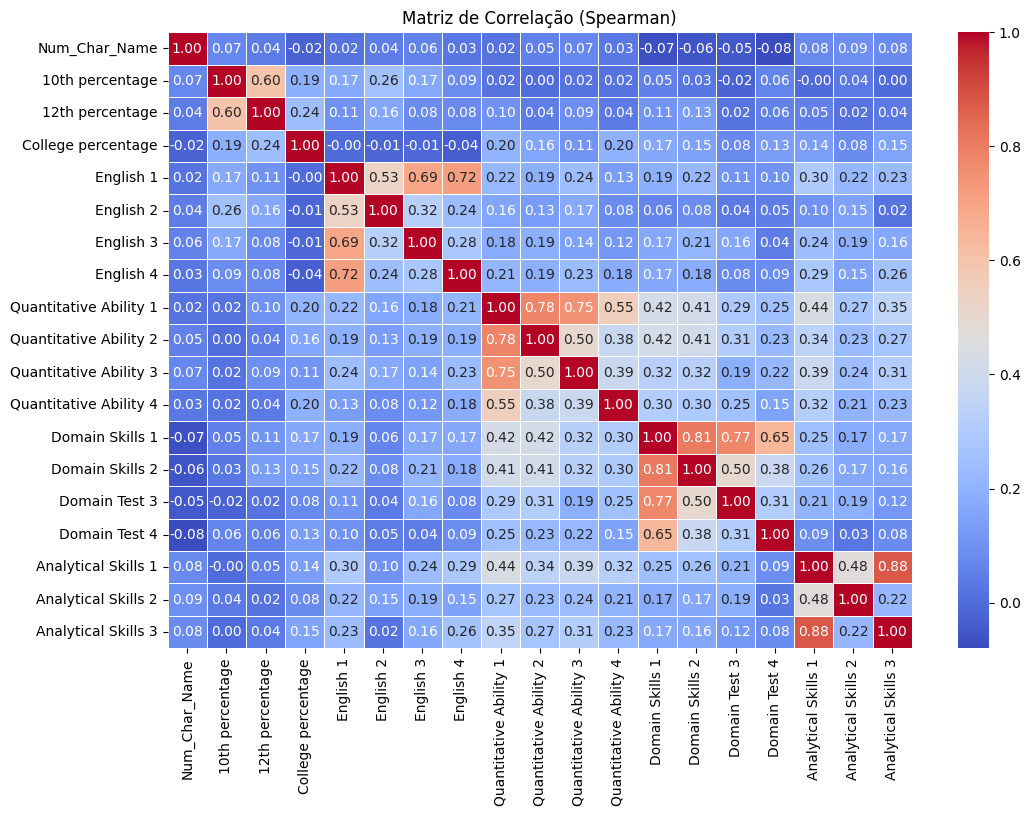

In [ ]:
# Matriz de correlação após normalização e arrumar as colunas
corr = db[["Num_Char_Name", "10th percentage",  "12th percentage", "College percentage", "English 1", "English 2", "English 3", "English 4", "Quantitative Ability 1", "Quantitative Ability 2", "Quantitative Ability 3", "Quantitative Ability 4", "Domain Skills 1", "Domain Skills 2", "Domain Test 3", "Domain Test 4", "Analytical Skills 1", "Analytical Skills 2", "Analytical Skills 3"]].corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90)
plt.title("Matriz de Correlação (Spearman)")
plt.show()

## Retirando Num_Char_Name

In [ ]:
remove_columns = ['Num_Char_Name']
db = db.drop(columns=remove_columns)

db.head()

,State (Location),10th percentage,12th percentage,Specialization in study,College percentage,English 1,English 2,English 3,English 4,Quantitative Ability 1,...,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance
0,N,0.619952,0.628415,B,0.169842,0.456522,0.660131,0.672727,0.693252,0.508772,...,0.653631,0.668712,0.452830,0.683453,0.702128,0.618321,0.921053,0.773585,0.949367,BP
1,D,0.637767,0.437158,B,0.491018,0.239130,0.660131,0.612121,0.558282,0.456140,...,0.564246,0.693252,0.471698,0.669065,0.702128,0.633588,0.578947,0.886792,0.518987,BP
2,N,0.692993,0.050000,G,0.226728,0.347826,0.712418,0.648485,0.619632,0.122807,...,0.508380,0.558282,0.433962,0.568345,0.744681,0.679389,0.473684,0.754717,0.253165,BP
3,F,0.536817,0.300546,B,0.634731,0.565217,0.908497,0.757576,0.668712,0.385965,...,0.553073,0.595092,0.320755,0.539568,0.730496,0.526718,0.289474,0.660377,0.291139,BP
4,E,0.000000,0.191257,K,0.164398,0.434783,0.633987,0.575758,0.779141,0.157895,...,0.385475,0.656442,0.150943,0.395683,0.446809,0.648855,0.263158,0.471698,0.341772,BP


## Detecção e Tratamento de Outliers

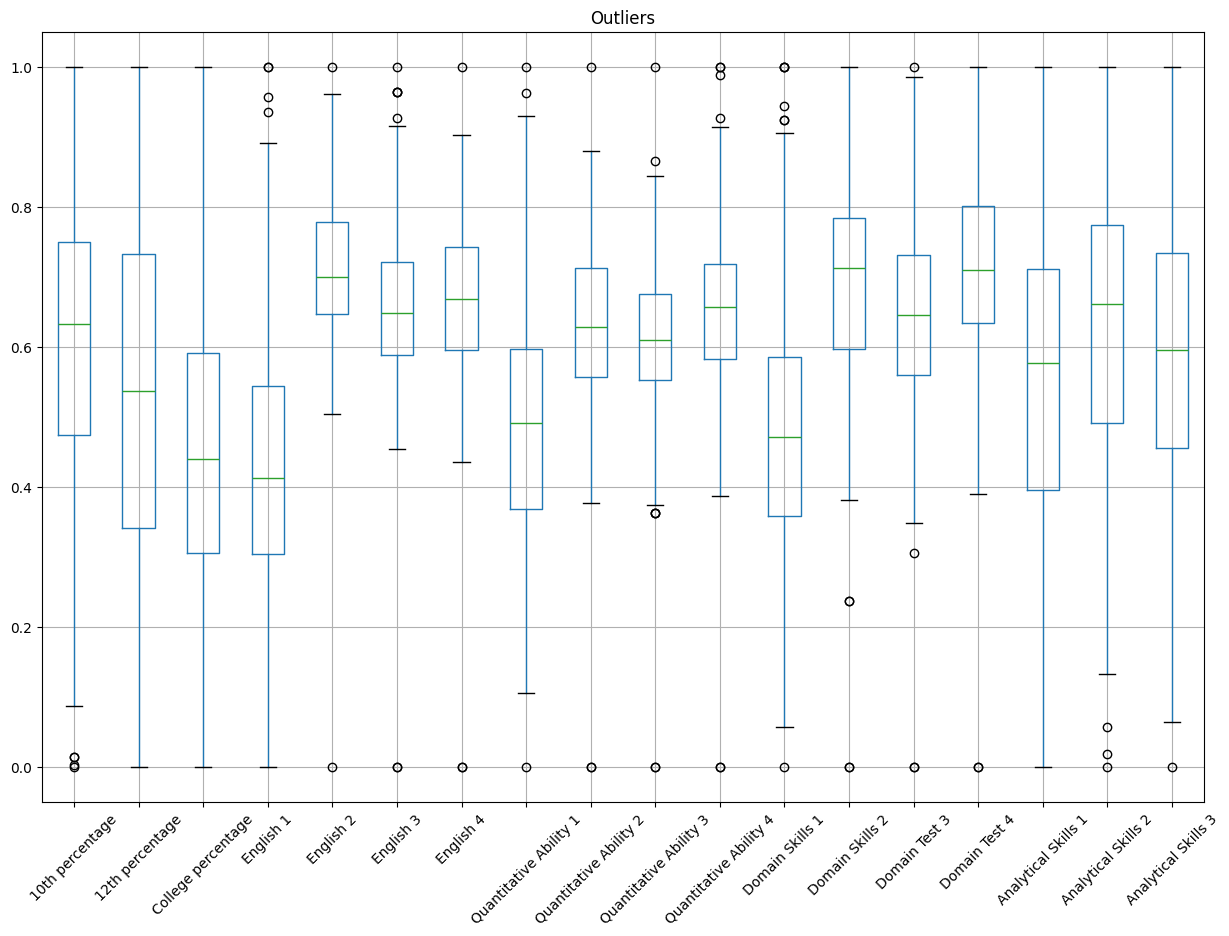

In [ ]:
# Utilização de boxplots para identificar outliers nas variáveis numéricas
numeric_columns = db.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 10))
db[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Outliers')
plt.show()

In [ ]:
# Calcula os limites dos boxplots (IQR)
limits = {}
for col in numeric_columns:
  Q1 = db[col].quantile(0.25)
  Q3 = db[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_lmt = Q1 - 1.5 * IQR
  upper_lmt = Q3 + 1.5 * IQR

  # Salva os limites
  limits[col] = {"min": lower_lmt, "max": upper_lmt}

  # Trunca
  db[col] = db[col].apply(lambda x: lower_lmt if x < lower_lmt else (upper_lmt if x > upper_lmt else x))

# Limites
print(limits)

{'10th percentage': {'min': np.float64(0.06057007125890723), 'max': np.float64(1.16270783847981)}, '12th percentage': {'min': np.float64(-0.2445355191256826), 'max': np.float64(1.3183060109289617)}, 'College percentage': {'min': np.float64(-0.12152966793685349), 'max': np.float64(1.018372346216657)}, 'English 1': {'min': np.float64(-0.05434782608695471), 'max': np.float64(0.9021739130434767)}, 'English 2': {'min': np.float64(0.4509803921568625), 'max': np.float64(0.9738562091503256)}, 'English 3': {'min': np.float64(0.38787878787878854), 'max': np.float64(0.9212121212121205)}, 'English 4': {'min': np.float64(0.37423312883435544), 'max': np.float64(0.9631901840490795)}, 'Quantitative Ability 1': {'min': np.float64(0.026315789473683515), 'max': np.float64(0.9385964912280705)}, 'Quantitative Ability 2': {'min': np.float64(0.3233532934131735), 'max': np.float64(0.9461077844311376)}, 'Quantitative Ability 3': {'min': np.float64(0.36871508379888257), 'max': np.float64(0.8603351955307266)}, '

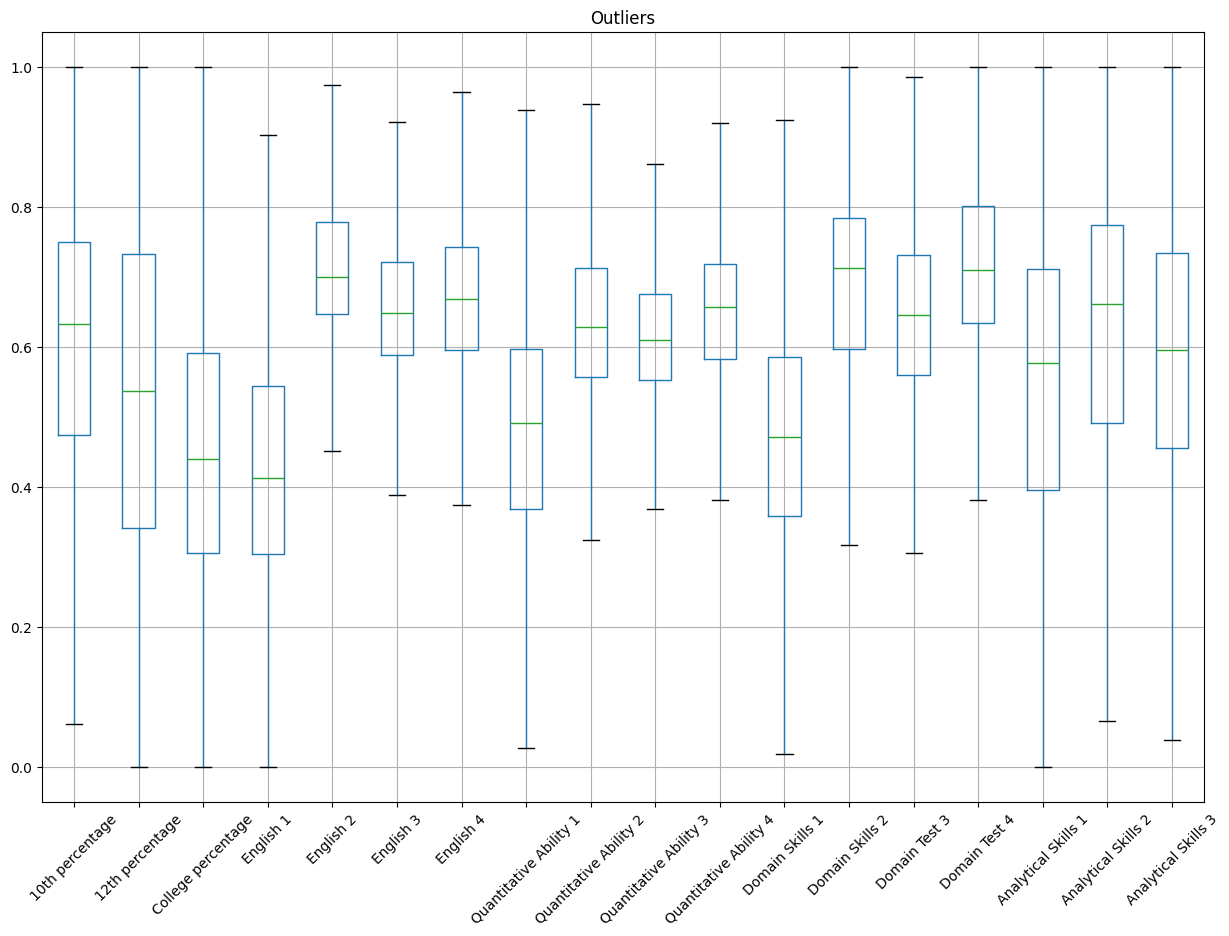

In [ ]:
# Utilização de boxplots para identificar outliers nas variáveis numéricas
numeric_columns = db.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 10))
db[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Outliers')
plt.show()

## Tratamento de variáveis categóricas/nominais

In [ ]:
# Tipos de dados
db.dtypes

,0
State (Location),object
10th percentage,float64
12th percentage,float64
Specialization in study,object
College percentage,float64
English 1,float64
English 2,float64
English 3,float64
English 4,float64
Quantitative Ability 1,float64


In [ ]:
nominal_columns = ['State (Location)', 'Specialization in study']
for col in nominal_columns:
  lb = LabelBinarizer()
  encoded = lb.fit_transform(db[col])
  encoded_db = pd.DataFrame(encoded, columns=[f"{col}_{cls}" for cls in lb.classes_], index=db.index)
  db = pd.concat([db.drop(col, axis=1), encoded_db], axis=1)

In [ ]:
db.head()

,10th percentage,12th percentage,College percentage,English 1,English 2,English 3,English 4,Quantitative Ability 1,Quantitative Ability 2,Quantitative Ability 3,...,Specialization in study_C,Specialization in study_D,Specialization in study_E,Specialization in study_F,Specialization in study_G,Specialization in study_H,Specialization in study_I,Specialization in study_J,Specialization in study_K,Specialization in study_L
0,0.619952,0.628415,0.169842,0.456522,0.660131,0.672727,0.693252,0.508772,0.652695,0.653631,...,0,0,0,0,0,0,0,0,0,0
1,0.637767,0.437158,0.491018,0.239130,0.660131,0.612121,0.558282,0.456140,0.580838,0.564246,...,0,0,0,0,0,0,0,0,0,0
2,0.692993,0.050000,0.226728,0.347826,0.712418,0.648485,0.619632,0.122807,0.377246,0.508380,...,0,0,0,0,1,0,0,0,0,0
3,0.536817,0.300546,0.634731,0.565217,0.908497,0.757576,0.668712,0.385965,0.544910,0.553073,...,0,0,0,0,0,0,0,0,0,0
4,0.060570,0.191257,0.164398,0.434783,0.633987,0.575758,0.779141,0.157895,0.652695,0.385475,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
db.dtypes

,0
10th percentage,float64
12th percentage,float64
College percentage,float64
English 1,float64
English 2,float64
English 3,float64
English 4,float64
Quantitative Ability 1,float64
Quantitative Ability 2,float64
Quantitative Ability 3,float64
